In [221]:
#!pip install pandas 
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [222]:
#Imports

import seaborn as sns
import matplotlib as plt
import pandas as pd
import missingno as msno
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import fancyimpute
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
import pickle

In [223]:
# Declarations

AV = AutoViz_Class()

In [224]:
df = pd.read_csv("C:\\Users\\diana\\Downloads\\Loans\\train.csv", index_col=False)

In [225]:
df.drop(columns=['Loan_ID'])

Gender Married Dependents   Education   Self_Employed  ApplicantIncome  \
0      Male     No       0          Graduate        No           5849         
1      Male    Yes       1          Graduate        No           4583         
2      Male    Yes       0          Graduate       Yes           3000         
3      Male    Yes       0      Not Graduate        No           2583         
4      Male     No       0          Graduate        No           6000         
..      ...     ...        ...           ...           ...              ...   
609  Female     No       0          Graduate        No           2900         
610    Male    Yes      3+          Graduate        No           4106         
611    Male    Yes       1          Graduate        No           8072         
612    Male    Yes       2          Graduate        No           7583         
613  Female     No       0          Graduate       Yes           4583         

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            0.0             NaN          360.0             1.0        
1         1508.0           128.0          360.0             1.0        
2            0.0            66.0          360.0             1.0        
3         2358.0           120.0          360.0             1.0        
4            0.0           141.0          360.0             1.0        
..                 ...         ...               ...             ...   
609          0.0            71.0          360.0             1.0        
610          0.0            40.0          180.0             1.0        
611        240.0           253.0          360.0             1.0        
612          0.0           187.0          360.0             1.0        
613          0.0           133.0          360.0             0.0        

    Property_Area Loan_Status  
0          Urban        Y      
1          Rural        N      
2          Urban        Y      
3          Urban        Y      
4          Urban        Y      
..            ...         ...  
609        Rural        Y      
610        Rural        Y      
611        Urban        Y      
612        Urban        Y      
613    Semiurban        N      

[614 rows x 12 columns]

In [226]:
print('\nINFO')
print(df.info())

print('\nSHAPE')
print(df.shape)

print('\nDESCRIPTION')
df.describe().T.round(2)


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

SHAPE
(614, 13)

DESCRIPTION


count   mean      std     min     25%     50%     75%    \
ApplicantIncome    614.0  5403.46  6109.04  150.0  2877.5  3812.5  5795.00   
CoapplicantIncome  614.0  1621.25  2926.25    0.0     0.0  1188.5  2297.25   
LoanAmount         592.0   146.41    85.59    9.0   100.0   128.0   168.00   
Loan_Amount_Term   600.0   342.00    65.12   12.0   360.0   360.0   360.00   
Credit_History     564.0     0.84     0.36    0.0     1.0     1.0     1.00   

                     max    
ApplicantIncome    81000.0  
CoapplicantIncome  41667.0  
LoanAmount           700.0  
Loan_Amount_Term     480.0  
Credit_History         1.0

In [227]:
df.loc[df['Dependents'] == '3+', 'Dependents'] = 3
df['Dependents'] = df['Dependents'].astype(float)

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countplot_with_annotations(df, column, hue=None):
    sns.set(style="whitegrid")
    ax = sns.countplot(x=column, data=df, hue=hue)

    total = len(df[column])

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom')

    plt.show()

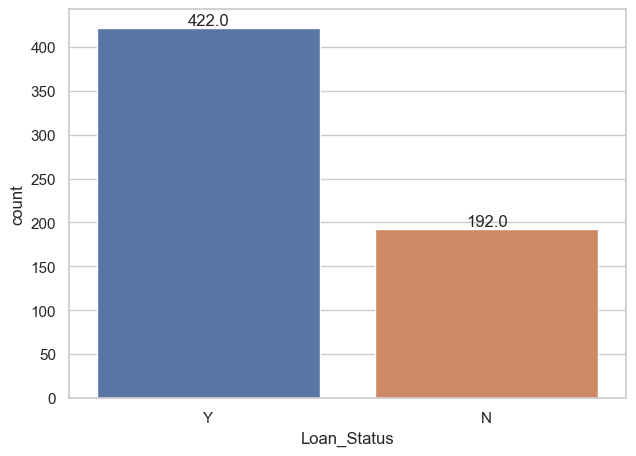

In [229]:
plot_countplot_with_annotations(df, 'Loan_Status', 'Loan_Status')

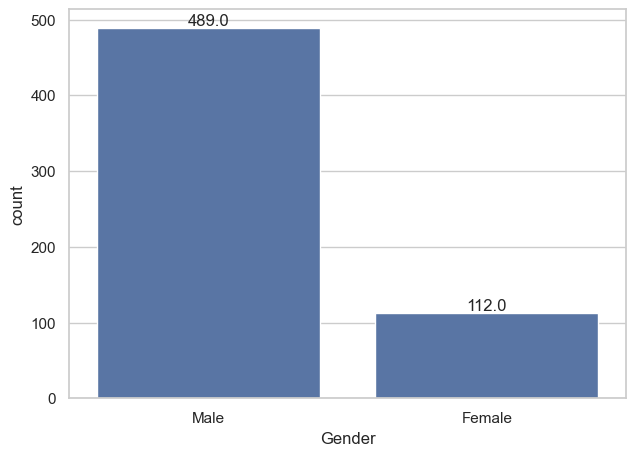

In [230]:
plot_countplot_with_annotations(df, 'Gender')

Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Loan_ID']
To fix these data quality issues in the dataset, import F

Number of All Scatter Plots = 10


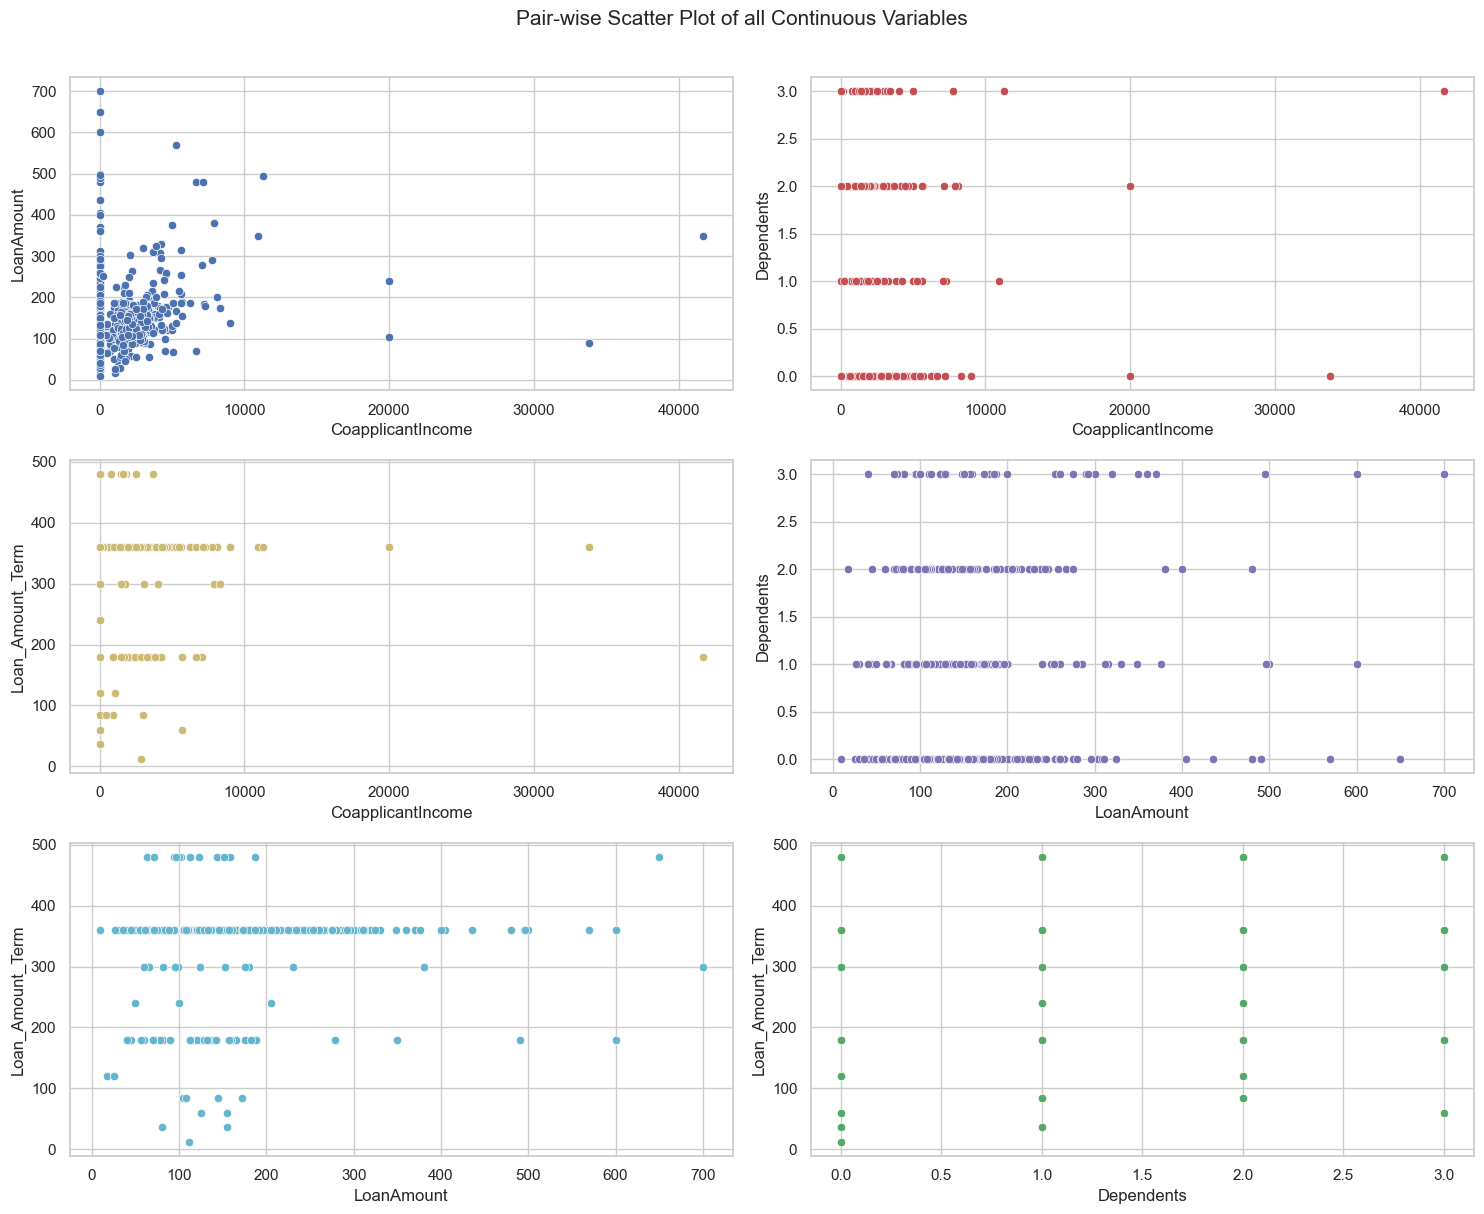

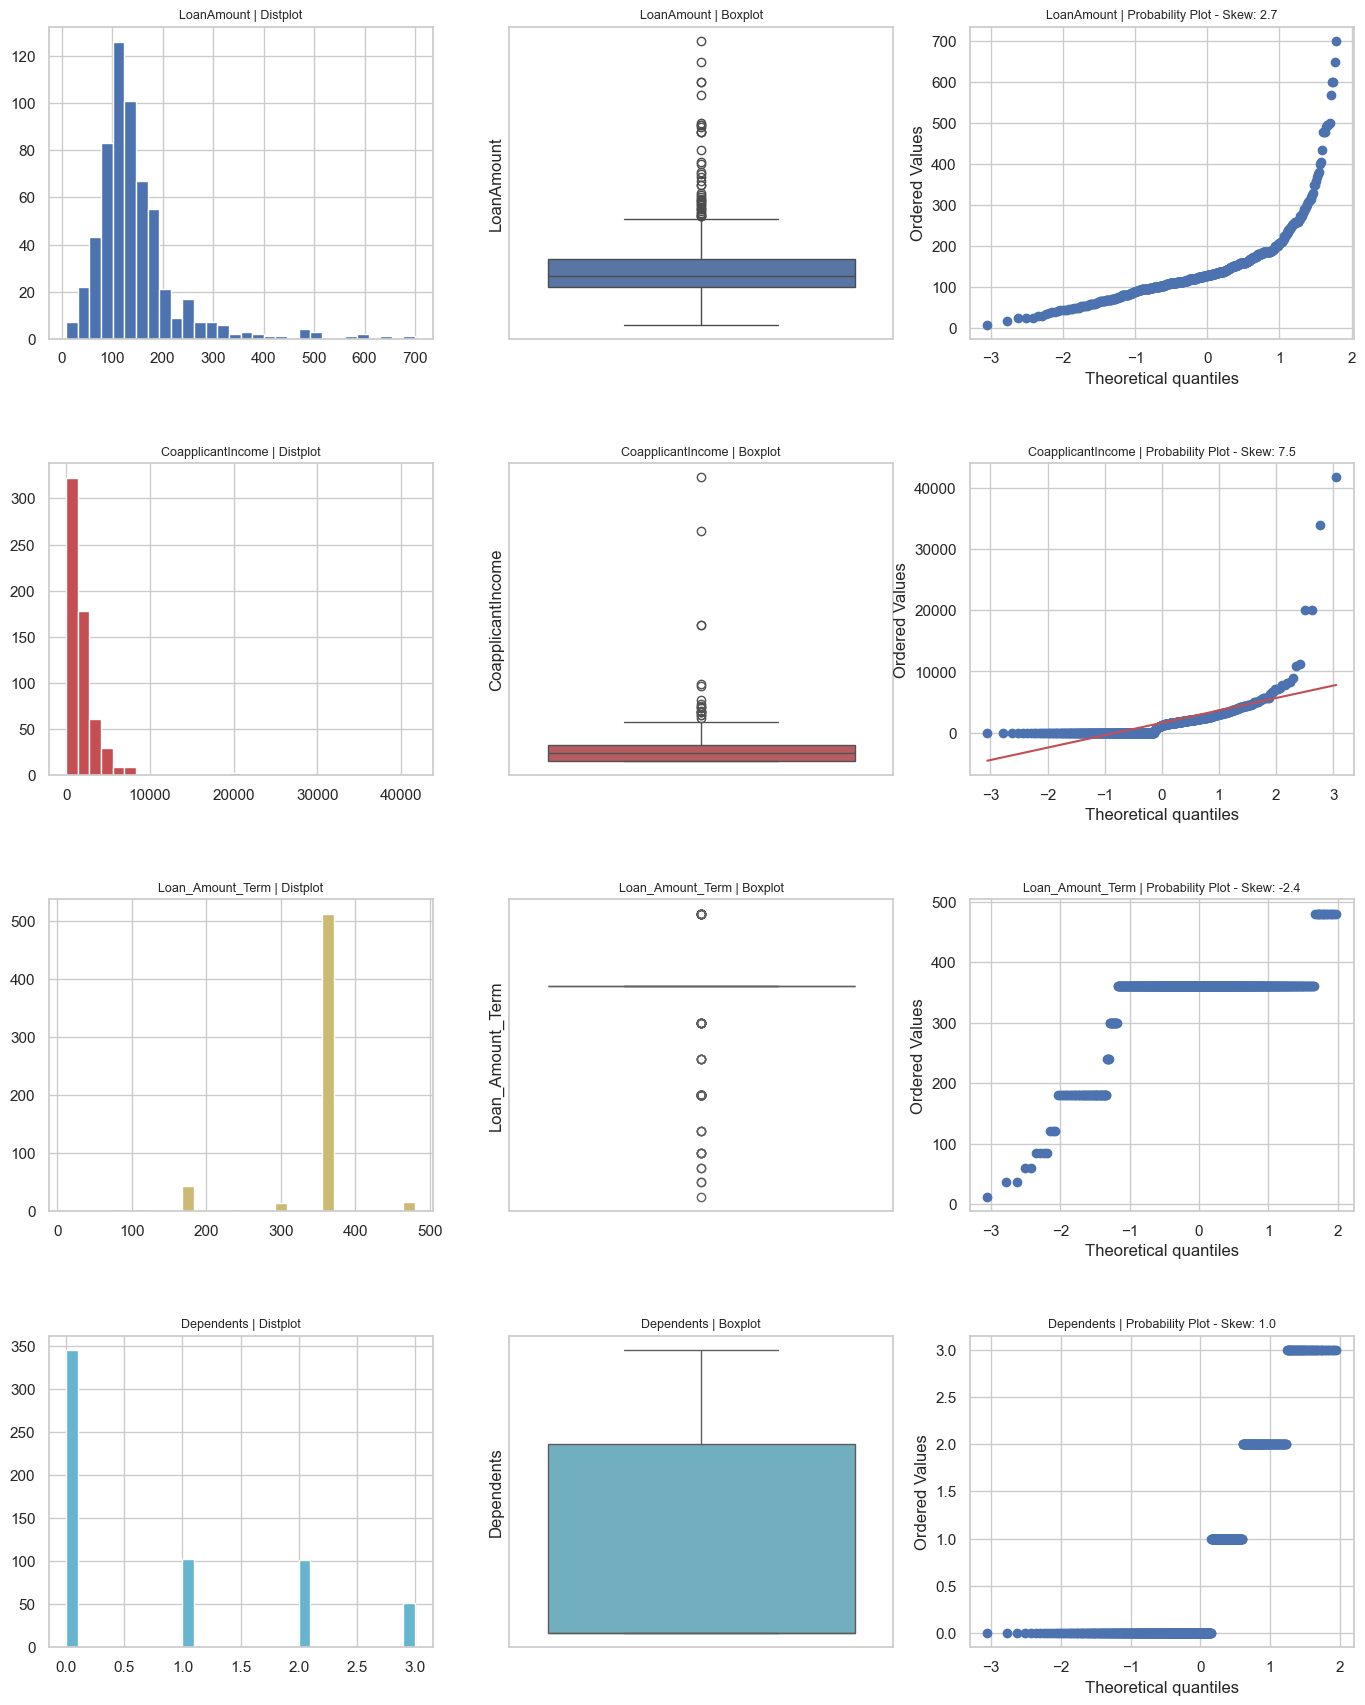

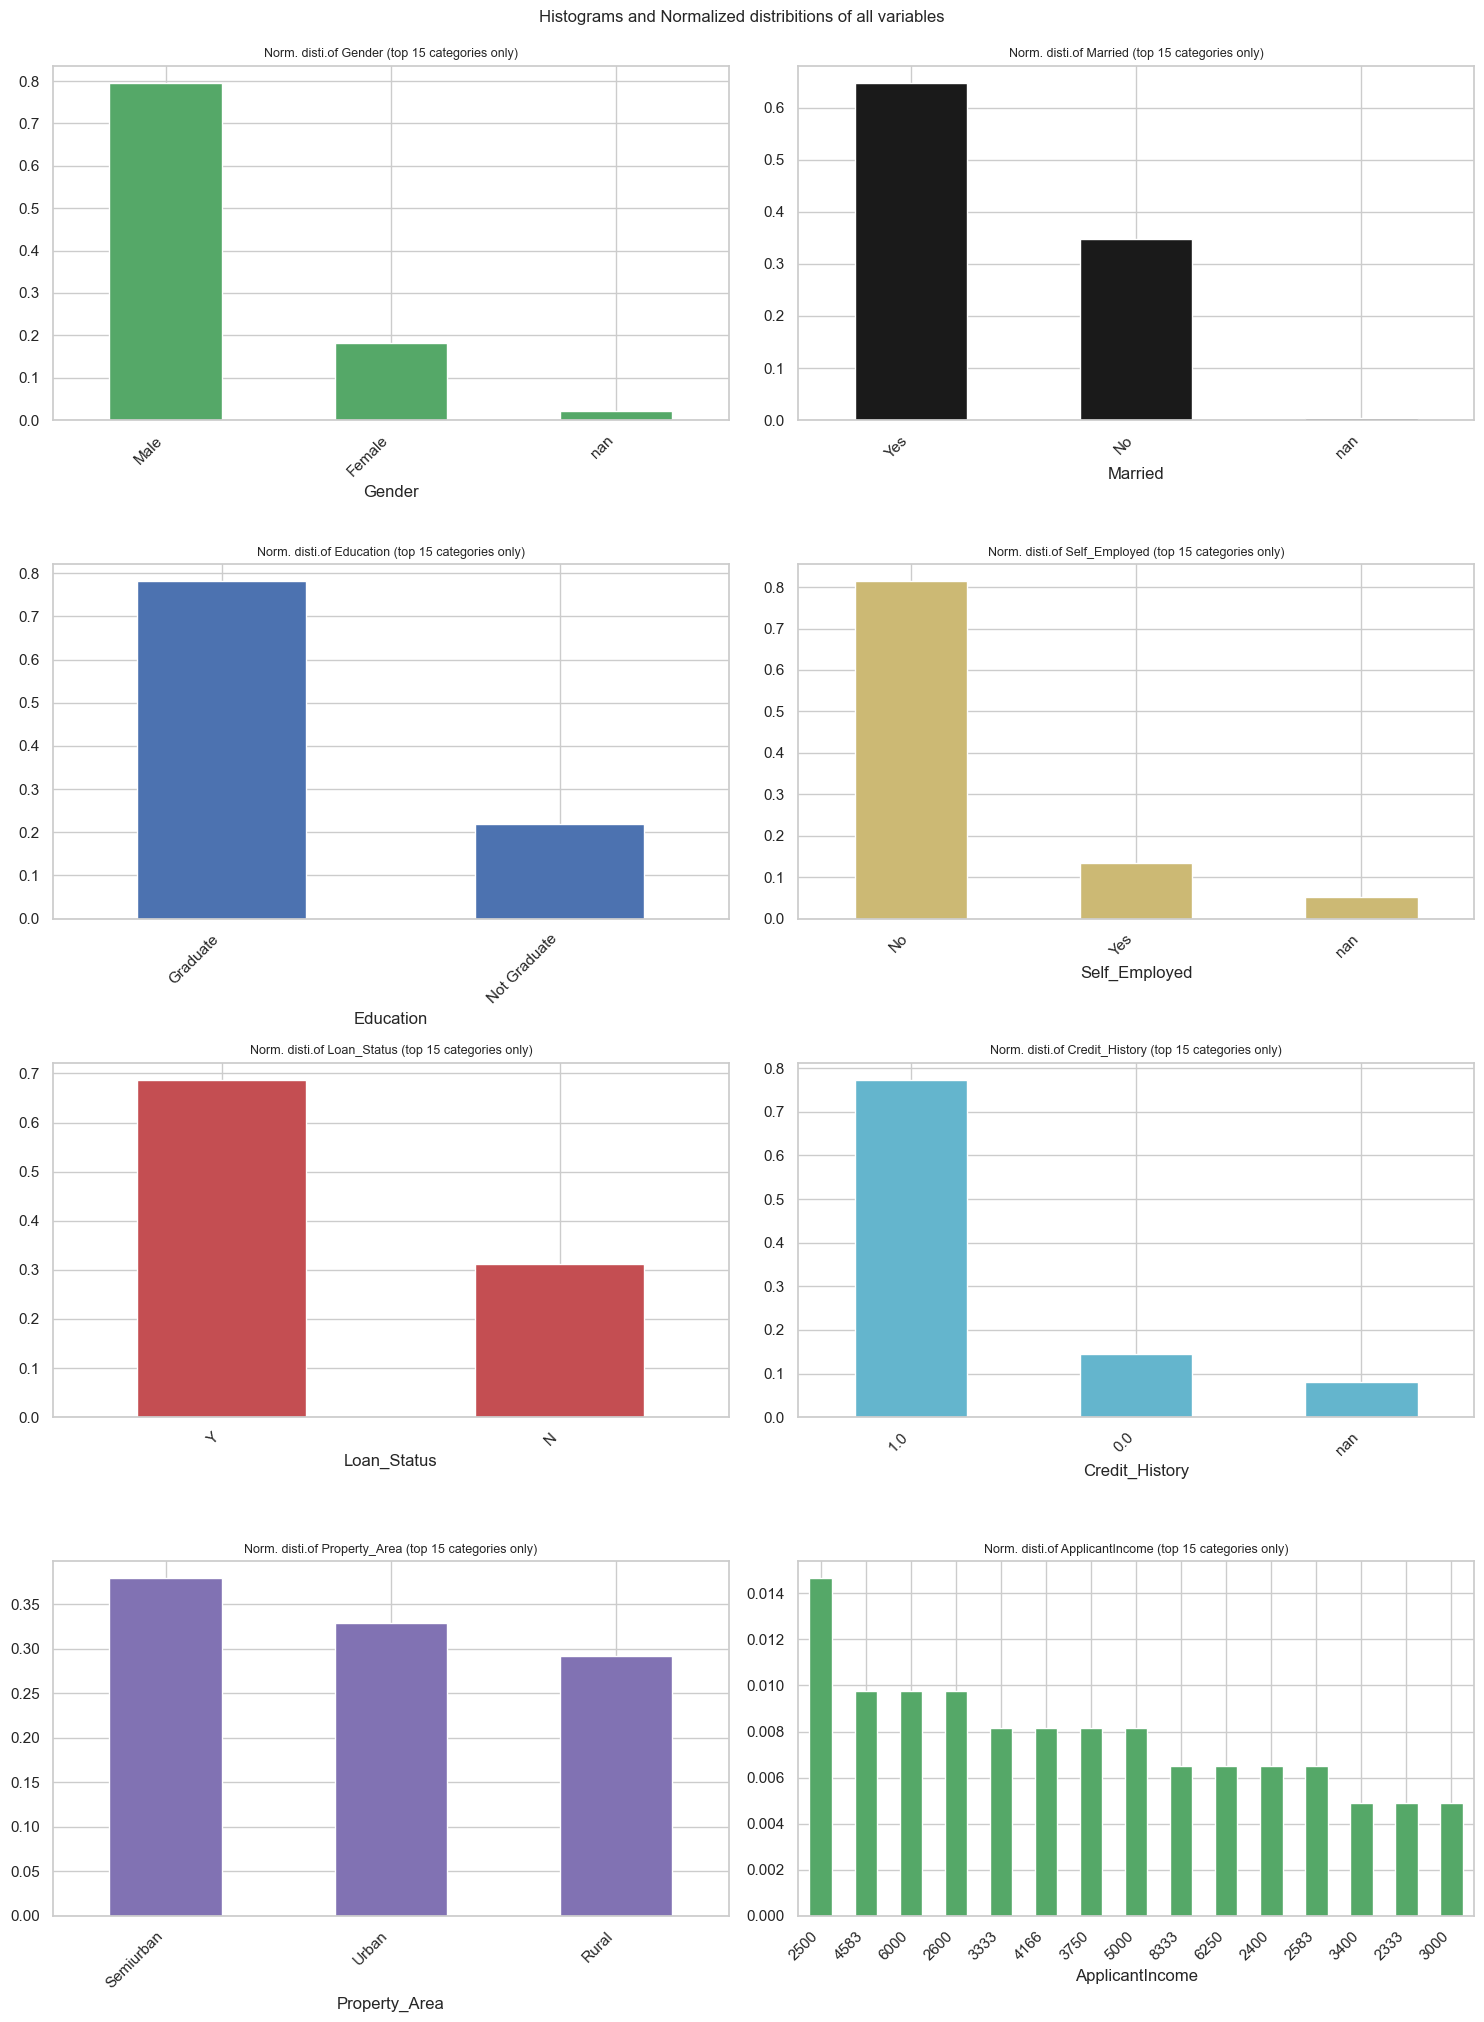

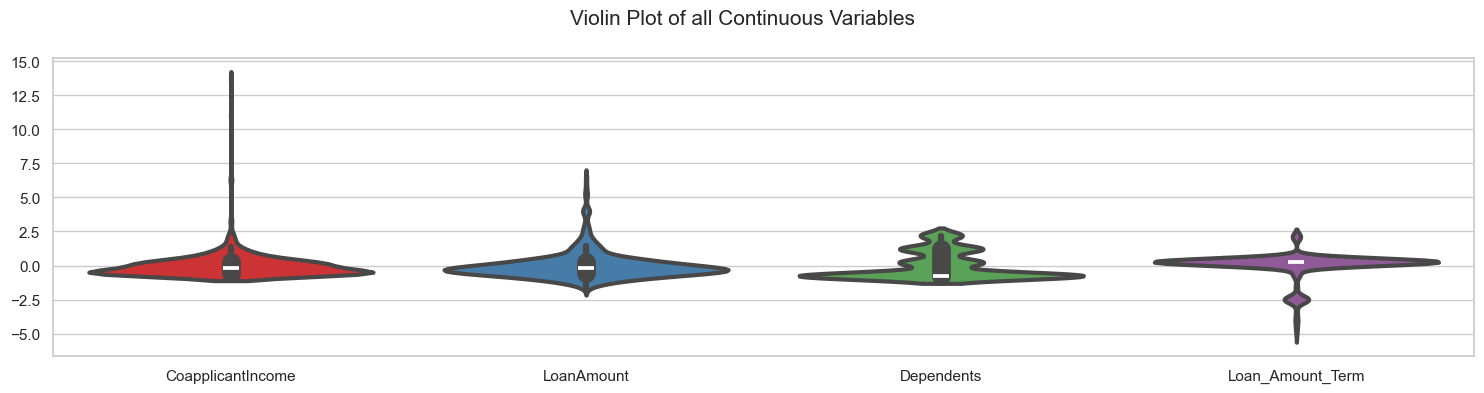

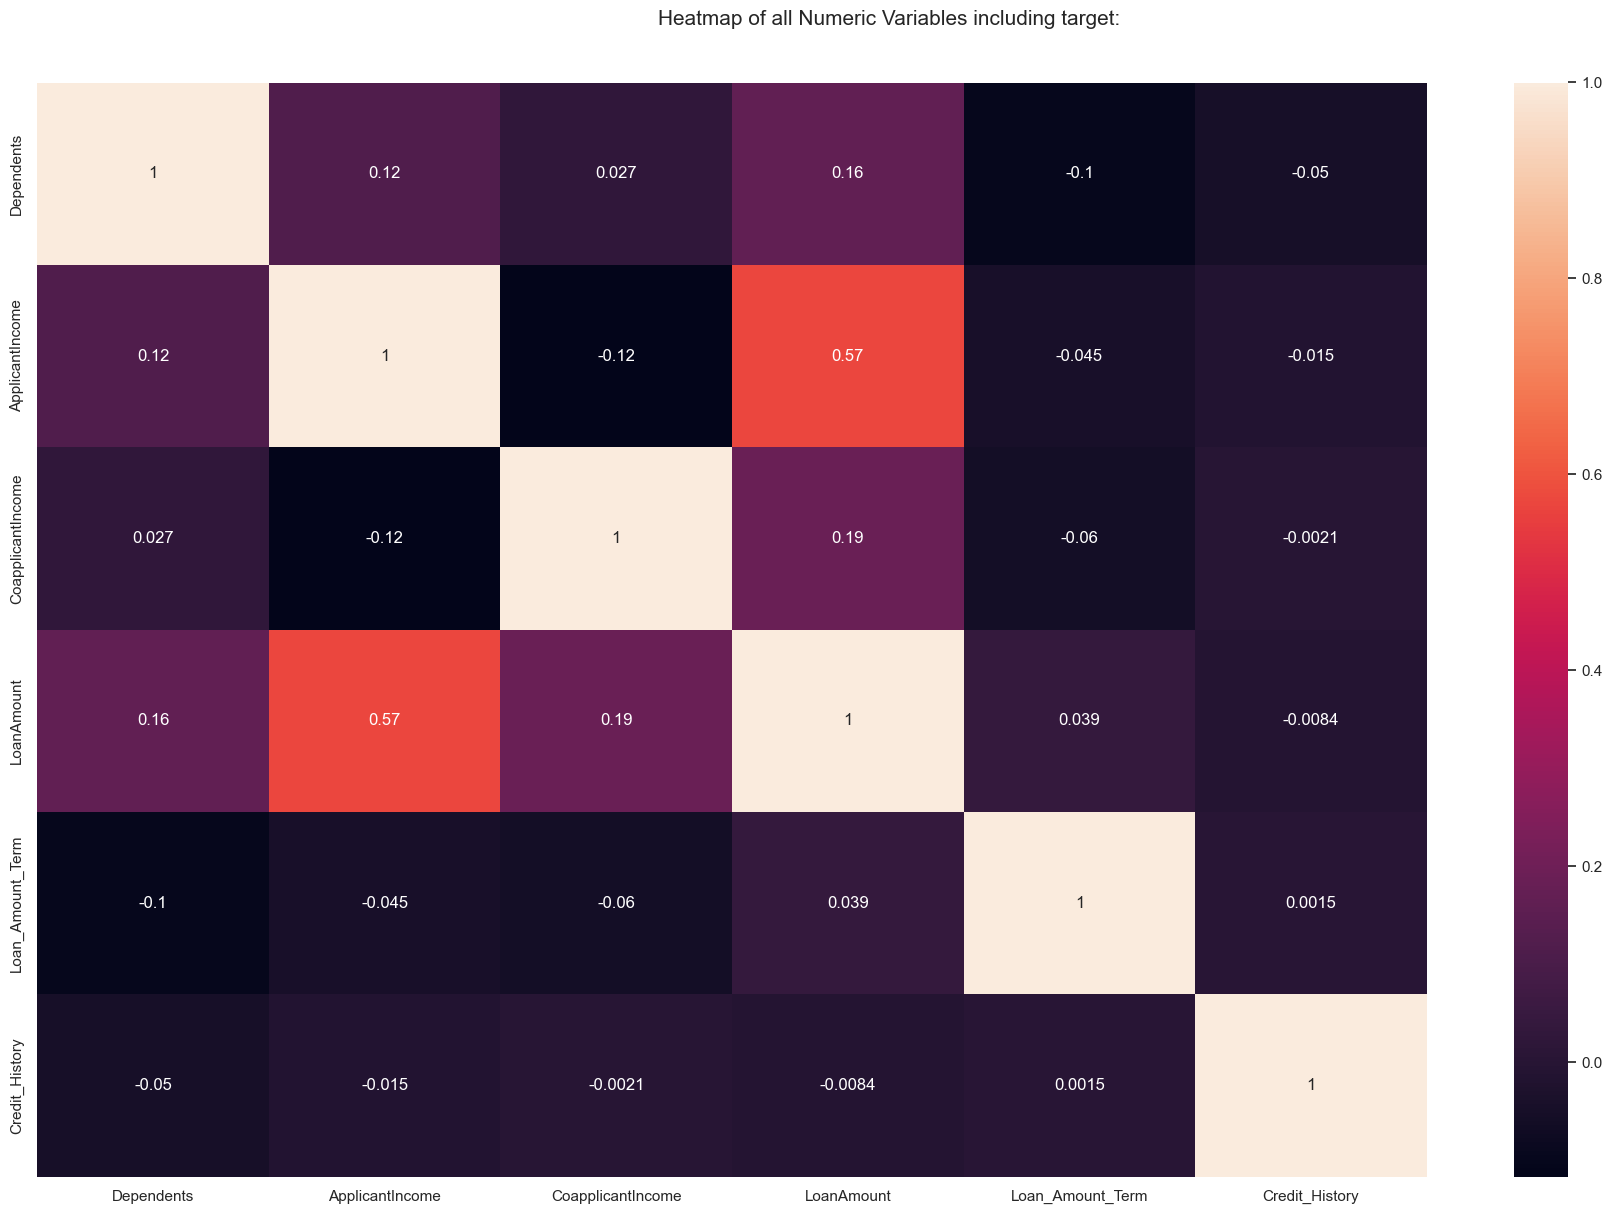

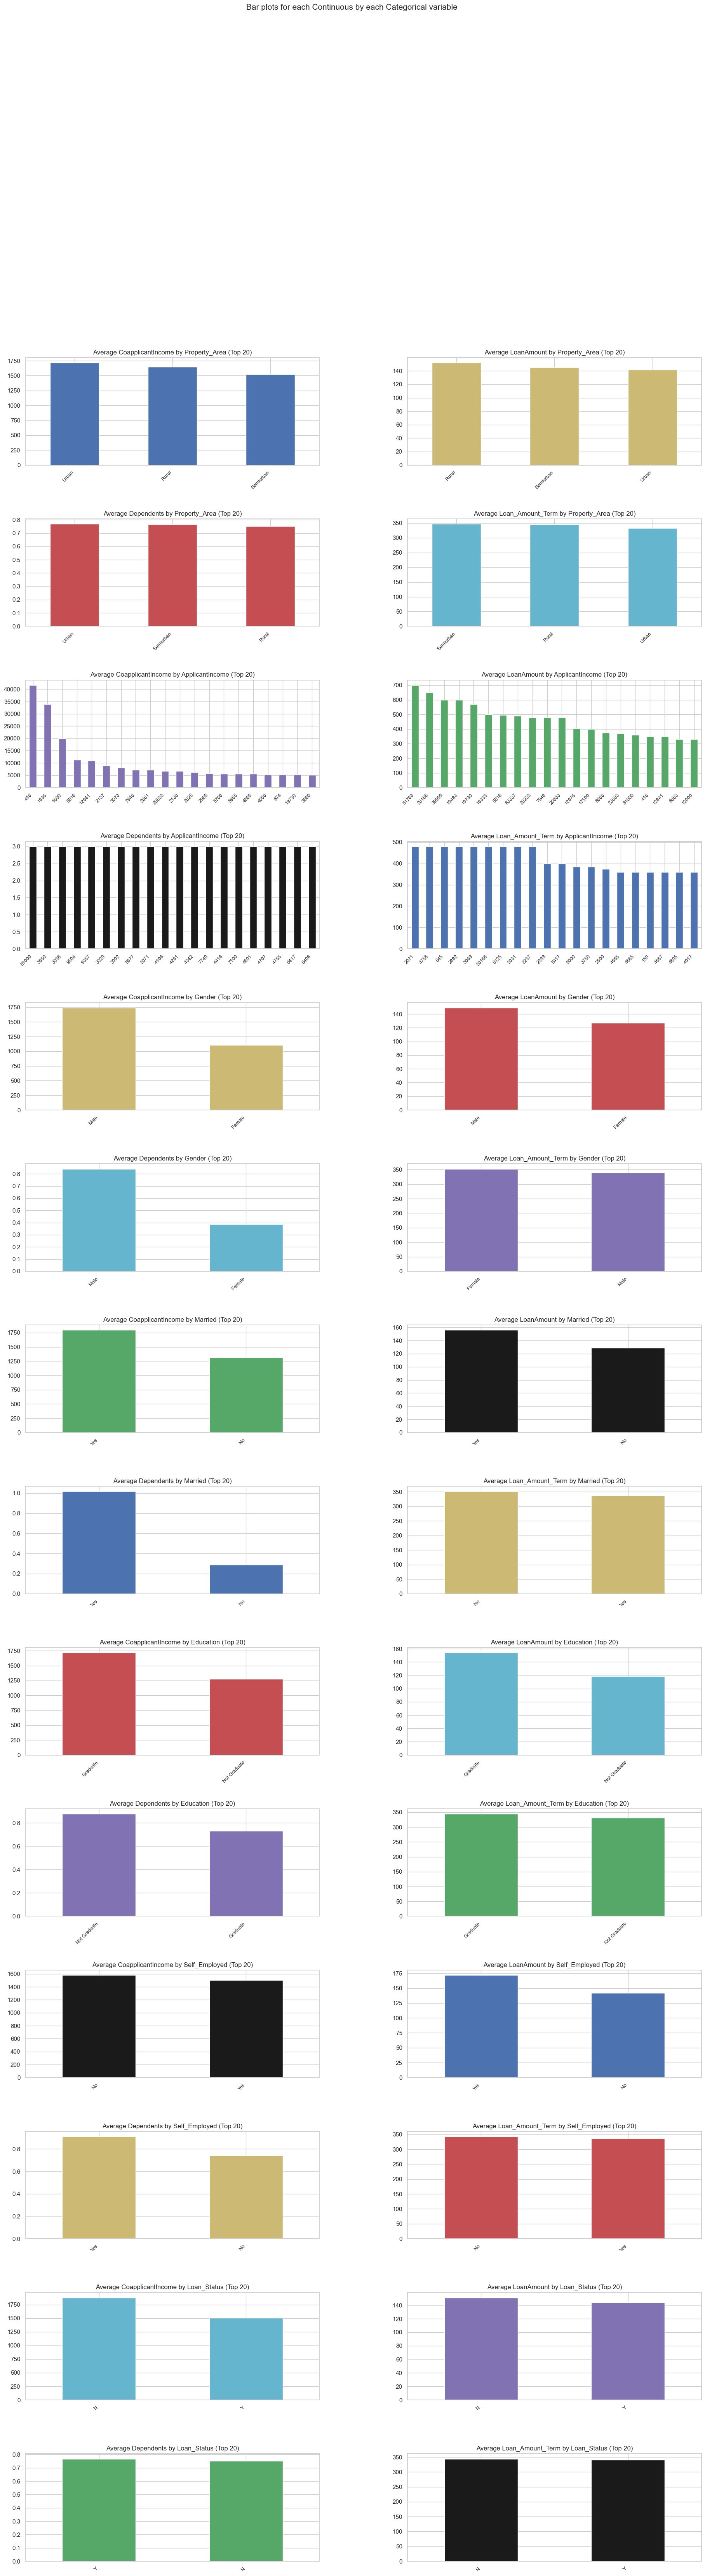

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Loan_ID   Gender Married  Dependents   Education   Self_Employed  \
0    LP001002    Male     No       0.0         Graduate        No       
1    LP001003    Male    Yes       1.0         Graduate        No       
2    LP001005    Male    Yes       0.0         Graduate       Yes       
3    LP001006    Male    Yes       0.0     Not Graduate        No       
4    LP001008    Male     No       0.0         Graduate        No       
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female     No       0.0         Graduate        No       
610  LP002979    Male    Yes       3.0         Graduate        No       
611  LP002983    Male    Yes       1.0         Graduate        No       
612  LP002984    Male    Yes       2.0         Graduate        No       
613  LP002990  Female     No       0.0         Graduate       Yes       

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         5849                0.0             NaN          360.0        
1         4583             1508.0           128.0          360.0        
2         3000                0.0            66.0          360.0        
3         2583             2358.0           120.0          360.0        
4         6000                0.0           141.0          360.0        
..               ...                ...         ...               ...   
609       2900                0.0            71.0          360.0        
610       4106                0.0            40.0          180.0        
611       8072              240.0           253.0          360.0        
612       7583                0.0           187.0          360.0        
613       4583                0.0           133.0          360.0        

     Credit_History Property_Area Loan_Status  
0          1.0             Urban        Y      
1          1.0             Rural        N      
2          1.0             Urban        Y      
3          1.0             Urban        Y      
4          1.0             Urban        Y      
..              ...           ...         ...  
609        1.0             Rural        Y      
610        1.0             Rural        Y      
611        1.0             Urban        Y      
612        1.0             Urban        Y      
613        0.0         Semiurban        N      

[614 rows x 13 columns]

In [231]:
AV.AutoViz(df)

In [232]:
# Take care of missing values:

# Gender
# Married
# Dependents
# Self_Employed
# LoanAmount
# Loan_Amount_Term
# Credit_History

<Axes: >

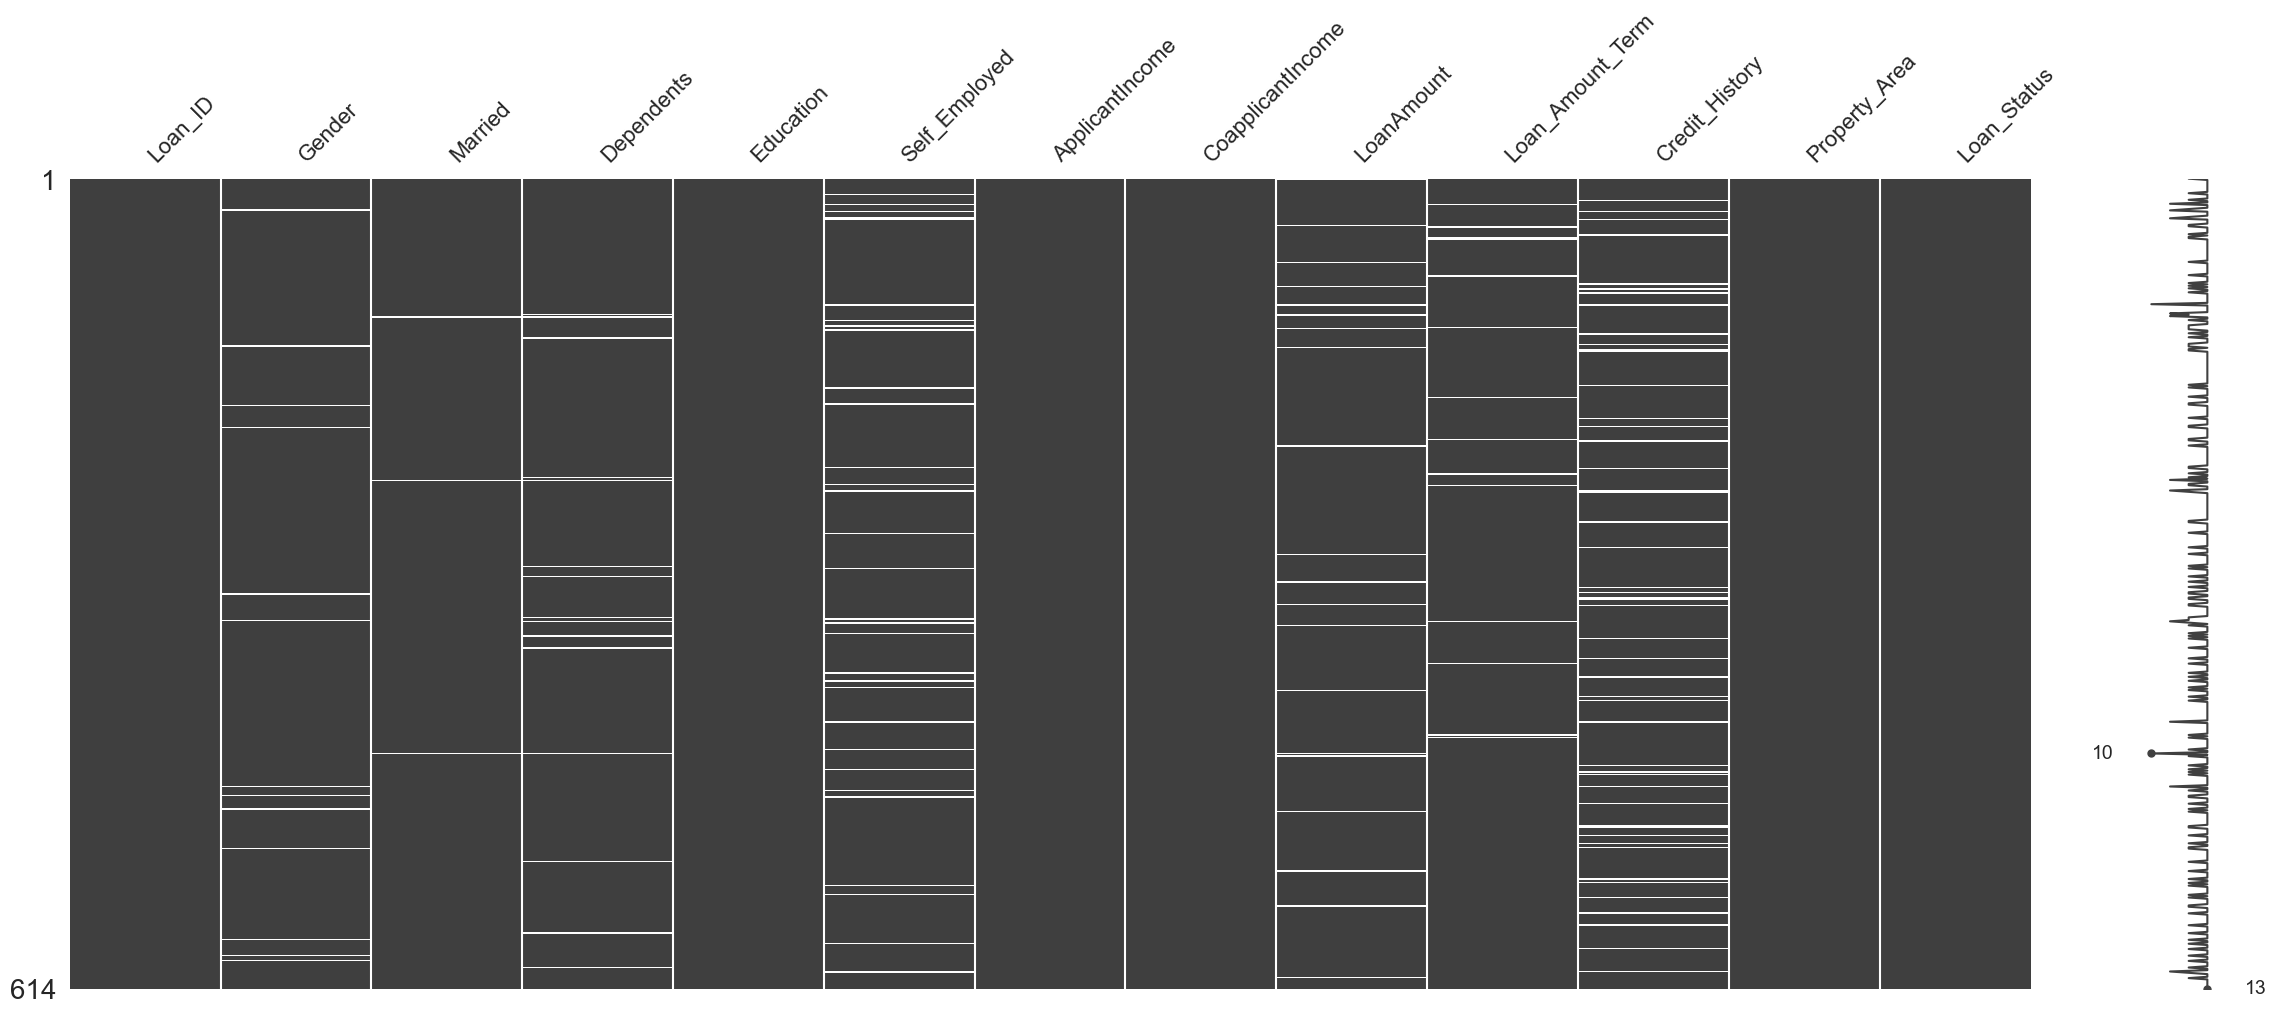

In [233]:
msno.matrix(df)

In [234]:
nan_columns = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

In [235]:
nan_counts = df.isnull().sum()
nan_counts = nan_counts[nan_counts > 0] 
nan_percentage = (nan_counts / len(df)) * 100

nan_analysis = pd.DataFrame({
        'Column': nan_counts.index,
        'NaN Count': nan_counts.values,
        'NaN Percentage': nan_percentage.values})
print(nan_analysis)

        Column       NaN Count  NaN Percentage
0            Gender     13         2.117264   
1           Married      3         0.488599   
2        Dependents     15         2.442997   
3     Self_Employed     32         5.211726   
4        LoanAmount     22         3.583062   
5  Loan_Amount_Term     14         2.280130   
6    Credit_History     50         8.143322   


In [236]:
mode_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [237]:
#for col in mode_cols:
#    df[col] = df[col].fillna(df[col].mode()[0])

In [238]:
df = df.drop(columns=['Loan_ID'])
df

Gender Married  Dependents   Education   Self_Employed  ApplicantIncome  \
0      Male     No       0.0         Graduate        No           5849         
1      Male    Yes       1.0         Graduate        No           4583         
2      Male    Yes       0.0         Graduate       Yes           3000         
3      Male    Yes       0.0     Not Graduate        No           2583         
4      Male     No       0.0         Graduate        No           6000         
..      ...     ...         ...           ...           ...              ...   
609  Female     No       0.0         Graduate        No           2900         
610    Male    Yes       3.0         Graduate        No           4106         
611    Male    Yes       1.0         Graduate        No           8072         
612    Male    Yes       2.0         Graduate        No           7583         
613  Female     No       0.0         Graduate       Yes           4583         

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            0.0             NaN          360.0             1.0        
1         1508.0           128.0          360.0             1.0        
2            0.0            66.0          360.0             1.0        
3         2358.0           120.0          360.0             1.0        
4            0.0           141.0          360.0             1.0        
..                 ...         ...               ...             ...   
609          0.0            71.0          360.0             1.0        
610          0.0            40.0          180.0             1.0        
611        240.0           253.0          360.0             1.0        
612          0.0           187.0          360.0             1.0        
613          0.0           133.0          360.0             0.0        

    Property_Area Loan_Status  
0          Urban        Y      
1          Rural        N      
2          Urban        Y      
3          Urban        Y      
4          Urban        Y      
..            ...         ...  
609        Rural        Y      
610        Rural        Y      
611        Urban        Y      
612        Urban        Y      
613    Semiurban        N      

[614 rows x 12 columns]

In [239]:
def label_encode_columns(df, columns):
    df_encoded = df.copy()
    for column in columns:
        le = LabelEncoder()
        # Temporarily fill NaN values to fit the encoder
        non_null_mask = df_encoded[column].notnull()
        df_encoded[column] = df_encoded[column].astype(str)
        df_encoded[column][non_null_mask] = le.fit_transform(df_encoded[column][non_null_mask])
        # Restore NaN values
        df_encoded[column] = df_encoded[column].replace('nan', pd.NA)
    return df_encoded

In [240]:
df

Gender Married  Dependents   Education   Self_Employed  ApplicantIncome  \
0      Male     No       0.0         Graduate        No           5849         
1      Male    Yes       1.0         Graduate        No           4583         
2      Male    Yes       0.0         Graduate       Yes           3000         
3      Male    Yes       0.0     Not Graduate        No           2583         
4      Male     No       0.0         Graduate        No           6000         
..      ...     ...         ...           ...           ...              ...   
609  Female     No       0.0         Graduate        No           2900         
610    Male    Yes       3.0         Graduate        No           4106         
611    Male    Yes       1.0         Graduate        No           8072         
612    Male    Yes       2.0         Graduate        No           7583         
613  Female     No       0.0         Graduate       Yes           4583         

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            0.0             NaN          360.0             1.0        
1         1508.0           128.0          360.0             1.0        
2            0.0            66.0          360.0             1.0        
3         2358.0           120.0          360.0             1.0        
4            0.0           141.0          360.0             1.0        
..                 ...         ...               ...             ...   
609          0.0            71.0          360.0             1.0        
610          0.0            40.0          180.0             1.0        
611        240.0           253.0          360.0             1.0        
612          0.0           187.0          360.0             1.0        
613          0.0           133.0          360.0             0.0        

    Property_Area Loan_Status  
0          Urban        Y      
1          Rural        N      
2          Urban        Y      
3          Urban        Y      
4          Urban        Y      
..            ...         ...  
609        Rural        Y      
610        Rural        Y      
611        Urban        Y      
612        Urban        Y      
613    Semiurban        N      

[614 rows x 12 columns]

In [241]:
df = label_encode_columns(df, ['Married', 'Gender', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])

In [242]:
pre_fill = df['LoanAmount']

In [267]:
from sklearn.impute import KNNImputer

imp_cols = ['LoanAmount', 'Loan_Amount_Term']
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(df[imp_cols]),columns = imp_cols)

for col in imp_cols:
    df[col] = imputed_data[col]

In [269]:
post_fill = df['LoanAmount']

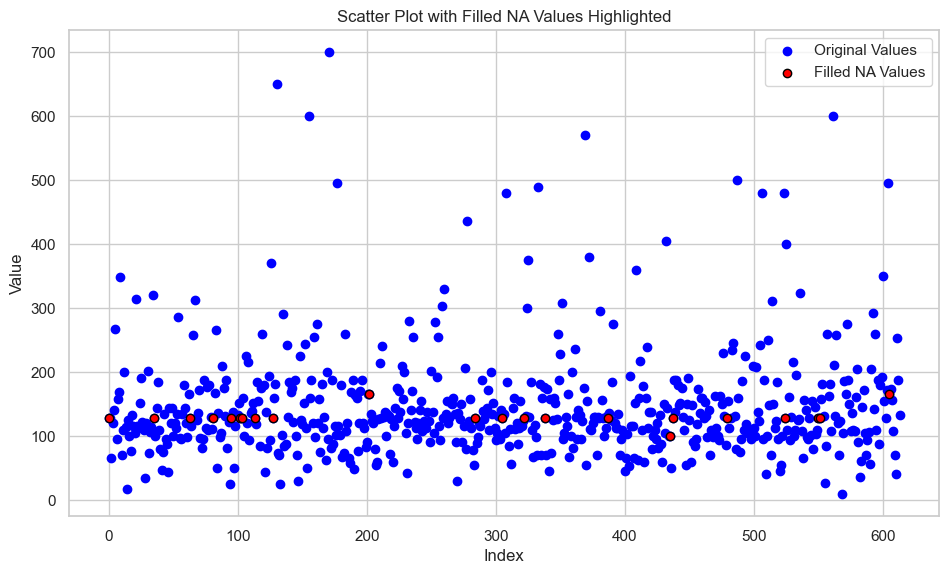

In [271]:
import matplotlib.pyplot as plt

orig_array = np.array(pre_fill)
filled_array = np.array(post_fill)

na_indices = np.where(np.isnan(orig_array))[0]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(filled_array)), filled_array, label='Original Values', color='blue')
plt.scatter(na_indices, filled_array[na_indices], label='Filled NA Values', color='red', marker='o', edgecolors='black')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot with Filled NA Values Highlighted')
plt.legend()

plt.show()

In [24]:

# Outliers

In [25]:
import matplotlib.pyplot as plt

def plot_with_boundaries(df, column):
    mean_val = df[column].mean()
    std_val = df[column].std()
    lower_sigma = mean_val - 3 * std_val
    upper_sigma = mean_val + 3 * std_val

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - 1.5 * IQR
    upper_iqr = Q3 + 1.5 * IQR

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])

    plt.axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val}')
    plt.axvline(lower_sigma, color='red', linestyle='--', label=f'Lower 3-Sigma: {lower_sigma}')
    plt.axvline(upper_sigma, color='red', linestyle='--', label=f'Upper 3-Sigma: {upper_sigma}')
    plt.axvline(lower_iqr, color='blue', linestyle='--', label=f'Lower IQR: {lower_iqr}')
    plt.axvline(upper_iqr, color='blue', linestyle='--', label=f'Upper IQR: {upper_iqr}')

    plt.legend()
    plt.title(f'{column} with IQR and 3-Sigma Boundaries')
    plt.xlabel(column)
    plt.show()

In [26]:
#incom_cols = ['ApplicantIncome','CoapplicantIncome']
#df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

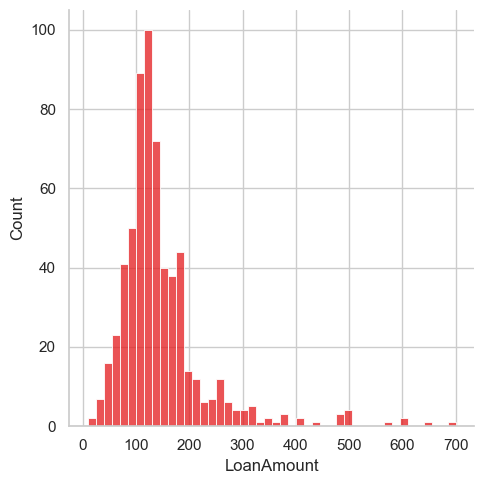

In [273]:
sns.displot(df['LoanAmount'])

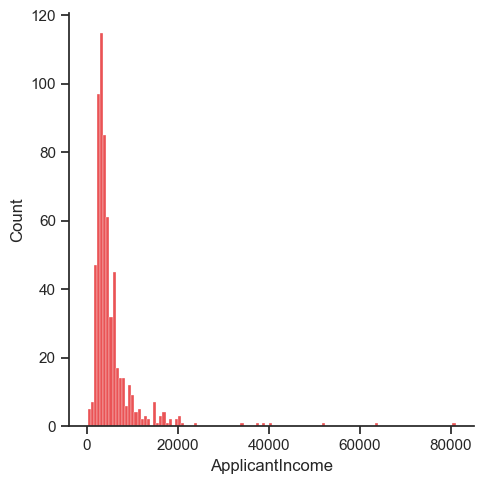

In [28]:
sns.displot(df['ApplicantIncome'])

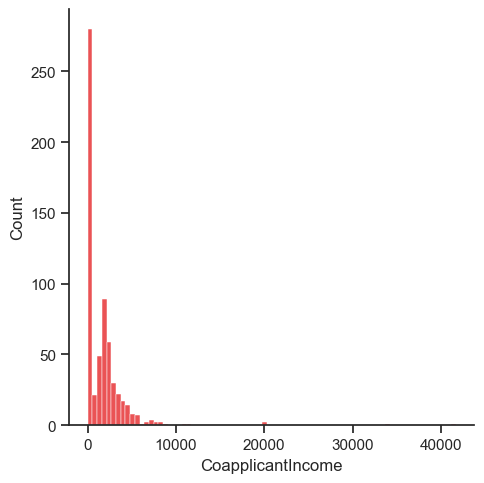

In [29]:
sns.displot(df['CoapplicantIncome'])

In [30]:
#sns.displot(df['Total_Income'])

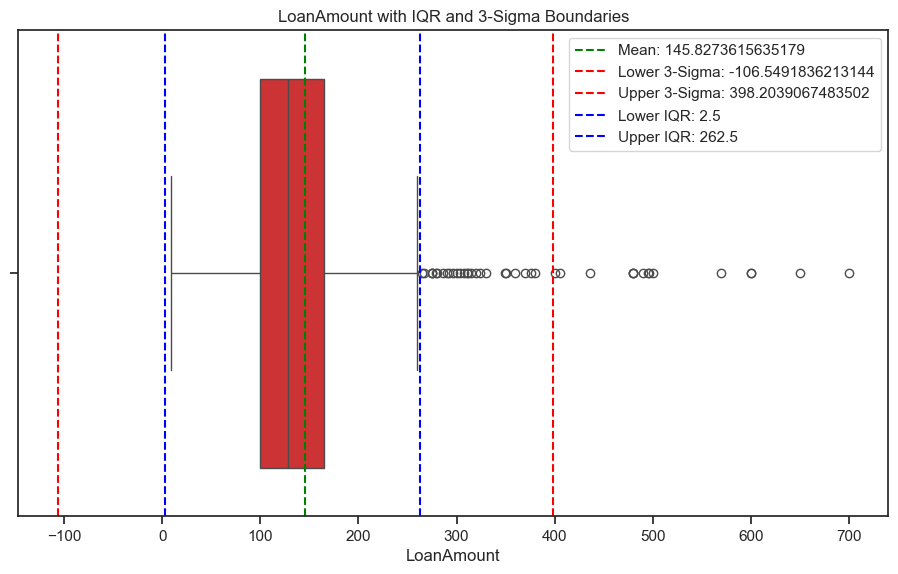

In [31]:
plot_with_boundaries(df, 'LoanAmount')

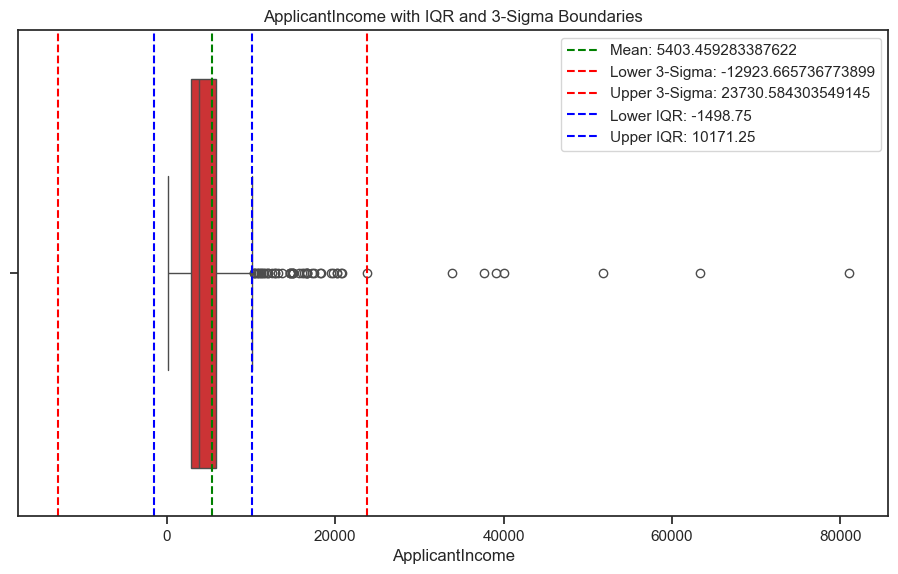

In [32]:
plot_with_boundaries(df, 'ApplicantIncome')

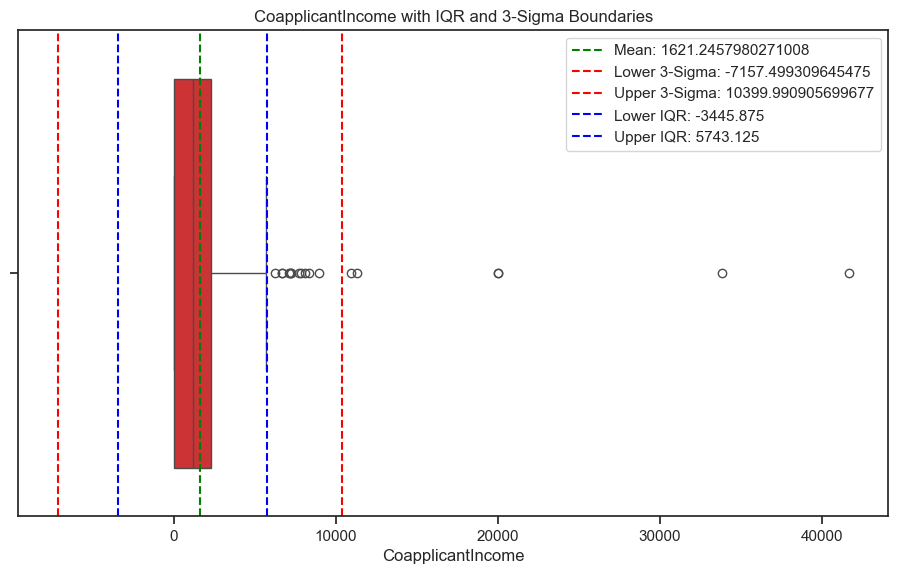

In [33]:
plot_with_boundaries(df, 'CoapplicantIncome')

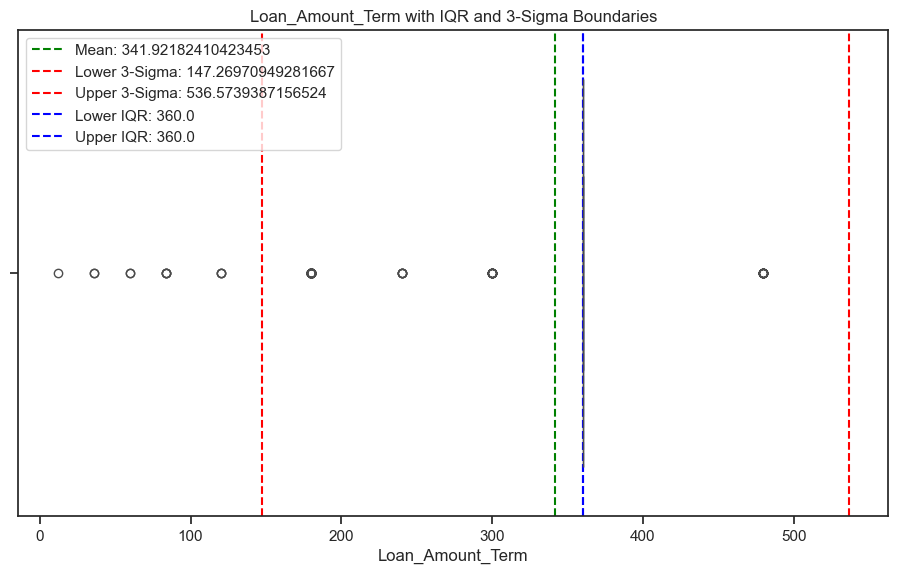

In [34]:
plot_with_boundaries(df, 'Loan_Amount_Term')

In [35]:
def outliers_df(df, cols):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in cols:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

In [36]:
outliers_cols = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
outliers_df = outliers_df(df, outliers_cols).sort_values('Percent', ascending=False)
outliers_df

Outlier count   Percent 
Loan_Amount_Term       90.0       14.657980
ApplicantIncome        50.0        8.143322
LoanAmount             41.0        6.677524
CoapplicantIncome      18.0        2.931596

In [37]:
def outliers(df, cols):
    label_out_df = df.copy()
    for col in label_out_df:
        if col in cols:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_df[col] = np.where(label_out_df[col] > upper_limit,'Outlier',np.where(label_out_df[col] < lower_limit,'Outlier',label_out_df[col]))
    return label_out_df

In [38]:
new_df_outliers = outliers(df, outliers_cols)
new_df_outliers.head(10)

Gender Married  Dependents Education Self_Employed ApplicantIncome  \
0    1       0        0.0         0           0              5849      
1    1       1        1.0         0           0              4583      
2    1       1        0.0         0           1              3000      
3    1       1        0.0         1           0              2583      
4    1       0        0.0         0           0              6000      
5    1       1        2.0         0           1              5417      
6    1       1        0.0         1           0              2333      
7    1       1        3.0         0           0              3036      
8    1       1        2.0         0           0              4006      
9    1       1        1.0         0           0           Outlier      

  CoapplicantIncome LoanAmount Loan_Amount_Term  Credit_History Property_Area  \
0           0.0         128.0        360.0             1.0             2        
1        1508.0         128.0        360.0             1.0             0        
2           0.0       Outlier        360.0             1.0             2        
3        2358.0         120.0        360.0             1.0             2        
4           0.0         141.0        360.0             1.0             2        
5       Outlier       Outlier        360.0             1.0             2        
6        1516.0          95.0        360.0             1.0             2        
7        2504.0         158.0        360.0             0.0             1        
8        1526.0         168.0        360.0             1.0             2        
9       Outlier       Outlier        360.0             1.0             1        

  Loan_Status  
0       1      
1       0      
2       1      
3       1      
4       1      
5       1      
6       1      
7       0      
8       1      
9       0

In [39]:
def capping(df):
    temp = df.copy()
    for col in temp:
        if col in outliers_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(df)
temp

Gender Married  Dependents Education Self_Employed  ApplicantIncome  \
0      1       0        0.0         0           0           5849.0        
1      1       1        1.0         0           0           4583.0        
2      1       1        0.0         0           1           3000.0        
3      1       1        0.0         1           0           2583.0        
4      1       0        0.0         0           0           6000.0        
..     ...     ...         ...       ...           ...              ...   
609    0       0        0.0         0           0           2900.0        
610    1       1        3.0         0           0           4106.0        
611    1       1        1.0         0           0              NaN        
612    1       1        2.0         0           0              NaN        
613    0       0        0.0         0           1           4583.0        

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            0.0           128.0          360.0             1.0        
1         1508.0           128.0          360.0             1.0        
2            0.0             NaN          360.0             1.0        
3         2358.0           120.0          360.0             1.0        
4            0.0           141.0          360.0             1.0        
..                 ...         ...               ...             ...   
609          0.0            71.0          360.0             1.0        
610          0.0             NaN            NaN             1.0        
611        240.0             NaN          360.0             1.0        
612          0.0           187.0          360.0             1.0        
613          0.0           133.0          360.0             0.0        

    Property_Area Loan_Status  
0          2            1      
1          0            0      
2          2            1      
3          2            1      
4          2            1      
..            ...         ...  
609        0            1      
610        0            1      
611        2            1      
612        2            1      
613        1            0      

[614 rows x 12 columns]

In [40]:
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [41]:
from scipy.stats import norm
from scipy.stats import ks_2samp

c=df
names=outliers_cols
#Creating df that reflects the correlation change
out_df= pd.DataFrame(columns=['feature','outliers_cnt','distribution_changed','correlation_changed'])

In [42]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       0       0          0          0            0               0          
1       0       0          0          0            0               0          
2       0       0          0          0            0               0          
3       0       0          0          0            0               0          
4       0       0          0          0            0               0          
..      ...      ...         ...        ...            ...              ...   
609     0       0          0          0            0               0          
610     0       0          0          0            0               0          
611     0       0          0          0            0               1          
612     0       0          0          0            0               1          
613     0       0          0          0            0               0          

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            0               0              0                0         
1            0               0              0                0         
2            0               1              0                0         
3            0               0              0                0         
4            0               0              0                0         
..                 ...         ...               ...             ...   
609          0               0              0                0         
610          0               1              1                0         
611          0               1              0                0         
612          0               0              0                0         
613          0               0              0                0         

     Property_Area  Loan_Status  
0          0             0       
1          0             0       
2          0             0       
3          0             0       
4          0             0       
..             ...          ...  
609        0             0       
610        0             0       
611        0             0       
612        0             0       
613        0             0       

[614 rows x 12 columns]

In [43]:
no_outliers=df.copy()
out_df = pd.DataFrame()
np.seterr(divide='ignore', invalid='ignore')
for i in outliers_cols:
#    print(i)
#     df with outliers
    out=df[i]
#     df with out outliers
    non=df[i].loc[df_outliers[i]==0]

    #sns.displot(x=out, hue=out, kind='kde', fill=True)
#     lable with outliers
    status_out=df['Loan_Status']
#     lable with out outliers
    status_non=df['Loan_Status'].loc[df_outliers[i]==0]
#     cocor pvalue
    p, pvalue = cocor(out,status_out, non,status_non)
    cor_change=np.where(pvalue<0.05,'+','-')
#     outliers count
    mv=df_outliers[i].sum()
#    ks pvalue
    pval=ks_2samp(out, non)[1]
    dist_change=np.where(pval<0.05,'+','-')
    new_row = pd.DataFrame({
        'feature': [i],
        'outliers_cnt': [mv],
        'distribution_changed': [dist_change],
        'correlation_changed': [cor_change]
    })
#    print(new_row)
    
    out_df = pd.concat([out_df, new_row], ignore_index=True)
out_df.head()

feature        outliers_cnt distribution_changed correlation_changed
0         LoanAmount       133               +                    -        
1    ApplicantIncome       107               +                    -        
2  CoapplicantIncome        74               +                    -        
3   Loan_Amount_Term        90               +                    -

In [45]:
df['Loan_Amount_Term_Bin'] = df['Loan_Amount_Term'].apply(lambda x: 1 if x >= 360 else 0)
df= df.drop(columns=['Loan_Amount_Term'])

In [47]:
df['Loan_Amount_Term_Bin'].value_counts()

Loan_Amount_Term_Bin
1    539
0     75
Name: count, dtype: int64

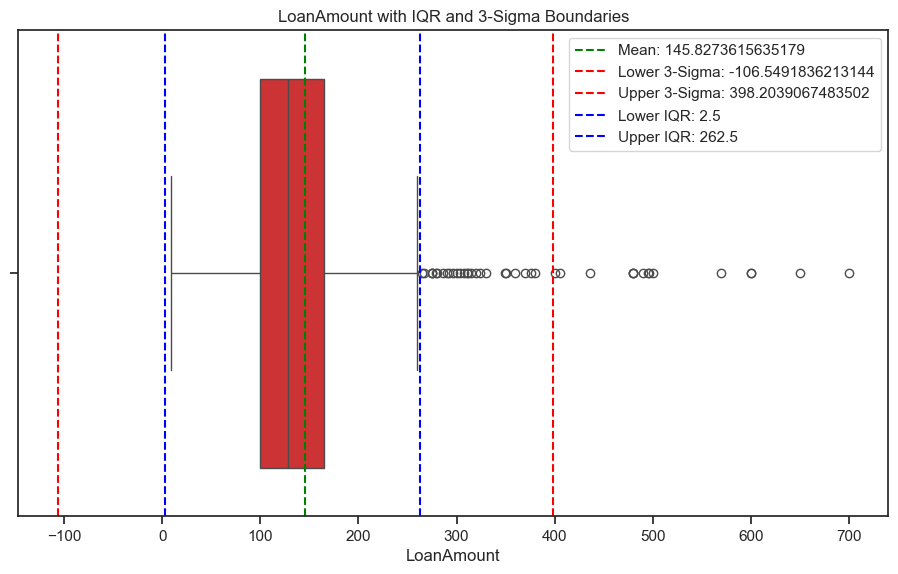

In [49]:
plot_with_boundaries(df, 'LoanAmount')

In [51]:
def delete_outlier_rows(df, columns, lower_bound, upper_bound):
    for col in columns:
        if col in df.columns:
            outlier_condition = (df[col] < lower_bound) | (df[col] > upper_bound)
            df = df[~outlier_condition]
    
    return df.reset_index(drop=True)

In [53]:
def cap_outliers_absolute(df, columns, lower_bound, upper_bound):
    for col in columns:
        if col in df.columns:
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [55]:
df.head()

Gender Married  Dependents Education Self_Employed  ApplicantIncome  \
0    1       0        0.0         0           0            5849         
1    1       1        1.0         0           0            4583         
2    1       1        0.0         0           1            3000         
3    1       1        0.0         1           0            2583         
4    1       0        0.0         0           0            6000         

   CoapplicantIncome  LoanAmount  Credit_History Property_Area Loan_Status  \
0          0.0           128.0          1.0             2            1       
1       1508.0           128.0          1.0             0            0       
2          0.0            66.0          1.0             2            1       
3       2358.0           120.0          1.0             2            1       
4          0.0           141.0          1.0             2            1       

   Loan_Amount_Term_Bin  
0            1           
1            1           
2            1           
3            1           
4            1

In [57]:
df_bk = df.copy()

In [61]:
def compare_distributions(df1, df2, columns, plot_type='histogram'):
    for col in columns:
        if col in df1.columns and col in df2.columns:
            plt.figure(figsize=(10, 6))

            if plot_type == 'histogram':
                sns.histplot(df1[col], color='blue', label='df1', kde=True, stat="density", alpha=0.5)
                sns.histplot(df2[col], color='red', label='df2', kde=True, stat="density", alpha=0.5)
            elif plot_type == 'boxplot':
                sns.boxplot(data=[df1[col], df2[col]], palette=["blue", "red"])
                plt.xticks([0, 1], ['df1', 'df2'])

            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Density' if plot_type == 'histogram' else 'Value')
            plt.legend()
            plt.show()

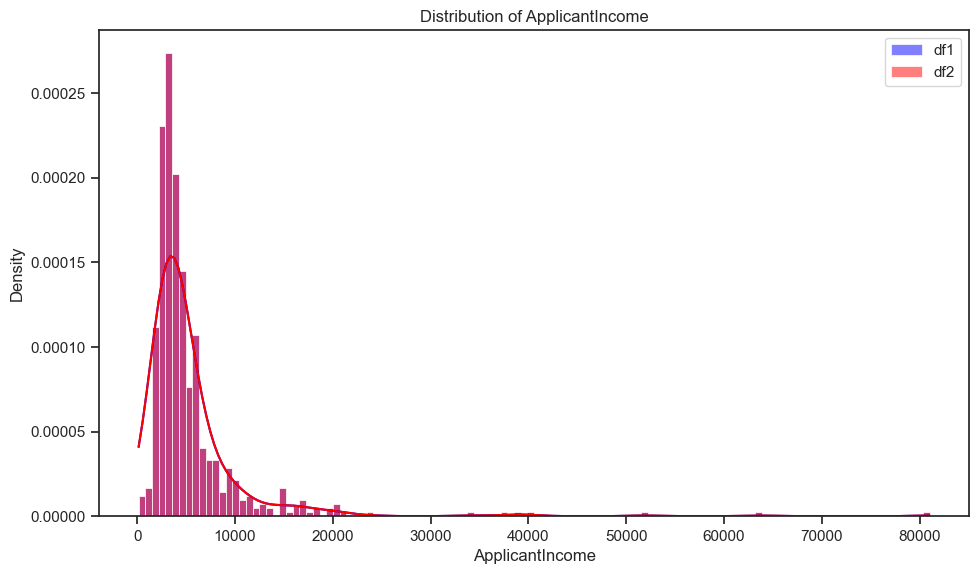

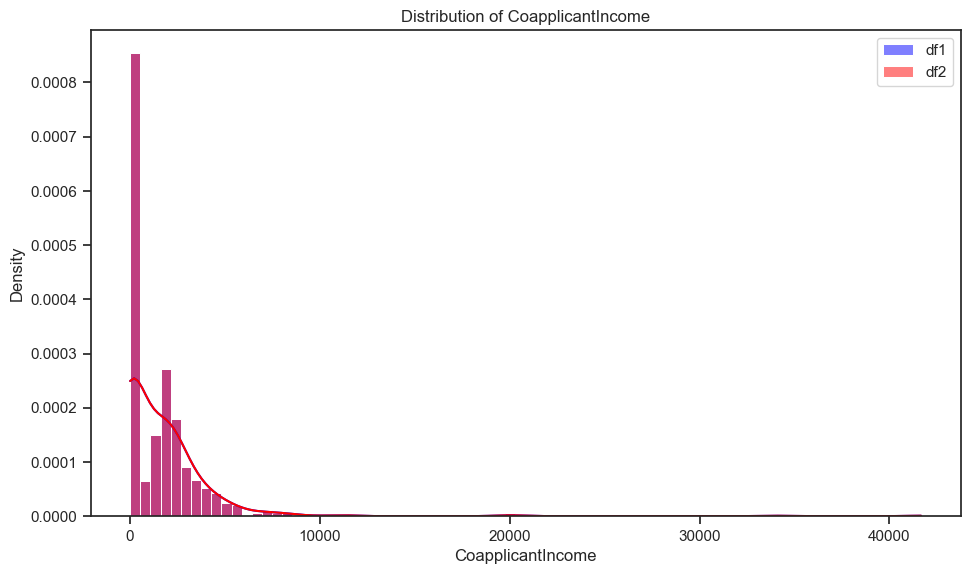

In [63]:
compare_distributions(df, df_bk, ['ApplicantIncome', 'CoapplicantIncome'])

In [65]:
from scipy.stats import ks_2samp

def has_distribution_changed(df1, df2, columns, alpha=0.05):
    distribution_changed = {}
    
    for col in columns:
        if col in df1.columns and col in df2.columns:
            stat, p_value = ks_2samp(df1[col].dropna(), df2[col].dropna())
            distribution_changed[col] = p_value < alpha
            
    return distribution_changed

In [67]:
from scipy.stats import ks_2samp

def has_correlation_changed(df1, df2, target_column, alpha=0.05):
    columns = [col for col in df1.columns if col != target_column and col in df2.columns]
    out_df = pd.DataFrame(columns=['feature', 'correlation_changed'])

    for col in columns:
        # Calculate correlation
        cor1 = df1[col].corr(df1[target_column])
        cor2 = df2[col].corr(df2[target_column])
        cor_change = np.where(abs(cor1 - cor2) > alpha, '+', '-')

        out_df = pd.concat([out_df, pd.DataFrame({'feature': [col],
                                                  'correlation_changed': [cor_change],
                                                  })], ignore_index=True)
    
    return out_df

In [69]:
def compare_correlations(df1, df2, columns):
    correlations_before = {}
    correlations_after = {}

    for col in columns:
        if col in df1.columns and col in df2.columns:
            correlations_before[col] = df1.corr()[col].drop(col)
            correlations_after[col] = df2.corr()[col].drop(col)

    correlations_before_df = pd.DataFrame(correlations_before)
    correlations_after_df = pd.DataFrame(correlations_after)

    correlation_diff = correlations_after_df - correlations_before_df

    result_df = pd.concat([correlations_before_df, correlations_after_df, correlation_diff], axis=1)
    result_df.columns = [f"{col}_before" for col in columns] + [f"{col}_after" for col in columns] + [f"{col}_diff" for col in columns]

    return result_df

In [71]:
compare_correlations(df, df_bk, ['ApplicantIncome', 'CoapplicantIncome'])

ApplicantIncome_before  CoapplicantIncome_before  \
ApplicantIncome                   NaN                -0.116605           
CoapplicantIncome           -0.116605                      NaN           
Credit_History              -0.018615                 0.011134           
Dependents                   0.118202                 0.030430           
Education                   -0.140760                -0.062290           
Gender                       0.058809                 0.082912           
LoanAmount                   0.564126                 0.189614           
Loan_Amount_Term_Bin        -0.065553                -0.066971           
Loan_Status                 -0.004710                -0.059187           
Married                      0.051708                 0.075948           
Property_Area               -0.009500                 0.010522           
Self_Employed                0.127180                -0.016100           

                      ApplicantIncome_after  CoapplicantIncome_after  \
ApplicantIncome                  NaN               -0.116605           
CoapplicantIncome          -0.116605                     NaN           
Credit_History             -0.018615                0.011134           
Dependents                  0.118202                0.030430           
Education                  -0.140760               -0.062290           
Gender                      0.058809                0.082912           
LoanAmount                  0.564126                0.189614           
Loan_Amount_Term_Bin       -0.065553               -0.066971           
Loan_Status                -0.004710               -0.059187           
Married                     0.051708                0.075948           
Property_Area              -0.009500                0.010522           
Self_Employed               0.127180               -0.016100           

                      ApplicantIncome_diff  CoapplicantIncome_diff  
ApplicantIncome                NaN                    0.0           
CoapplicantIncome              0.0                    NaN           
Credit_History                 0.0                    0.0           
Dependents                     0.0                    0.0           
Education                      0.0                    0.0           
Gender                         0.0                    0.0           
LoanAmount                     0.0                    0.0           
Loan_Amount_Term_Bin           0.0                    0.0           
Loan_Status                    0.0                    0.0           
Married                        0.0                    0.0           
Property_Area                  0.0                    0.0           
Self_Employed                  0.0                    0.0

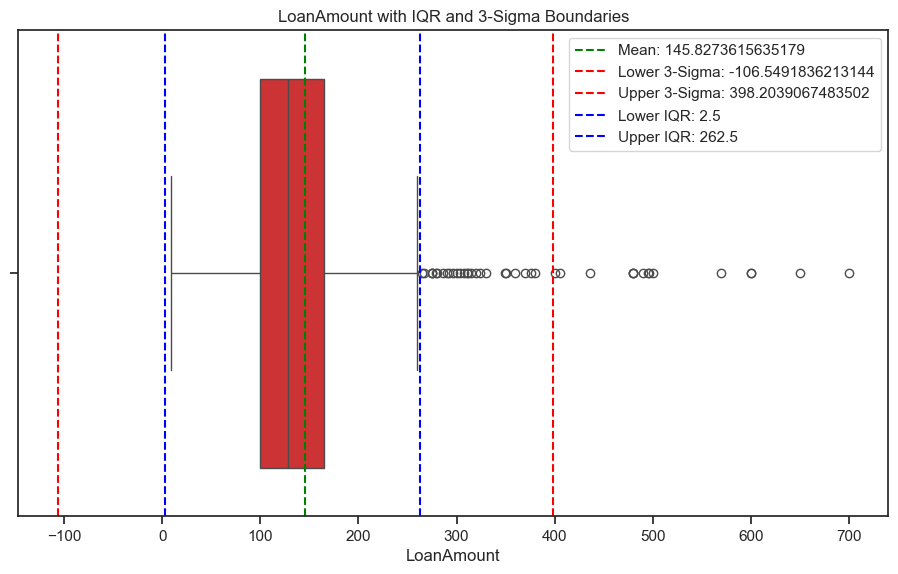

In [73]:
plot_with_boundaries(df, 'LoanAmount')

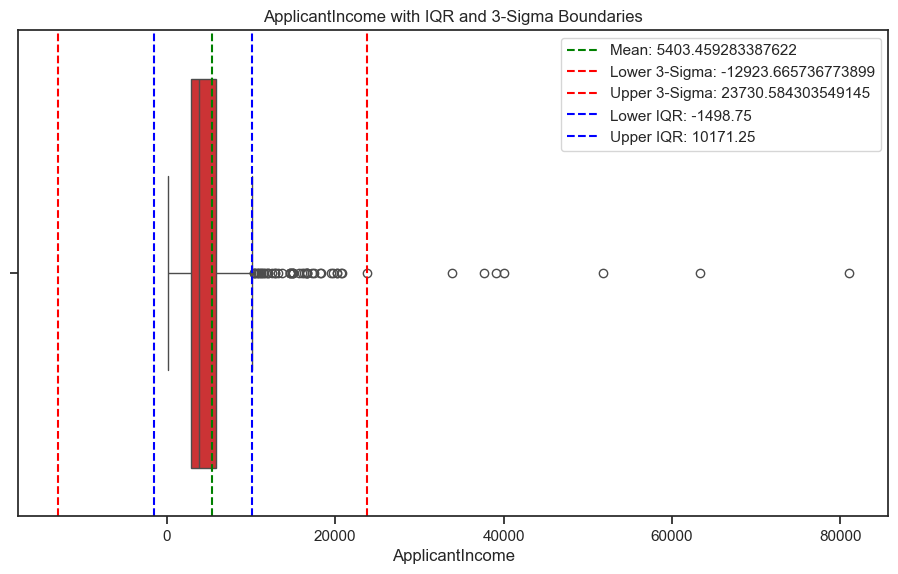

In [79]:
plot_with_boundaries(df, 'ApplicantIncome')

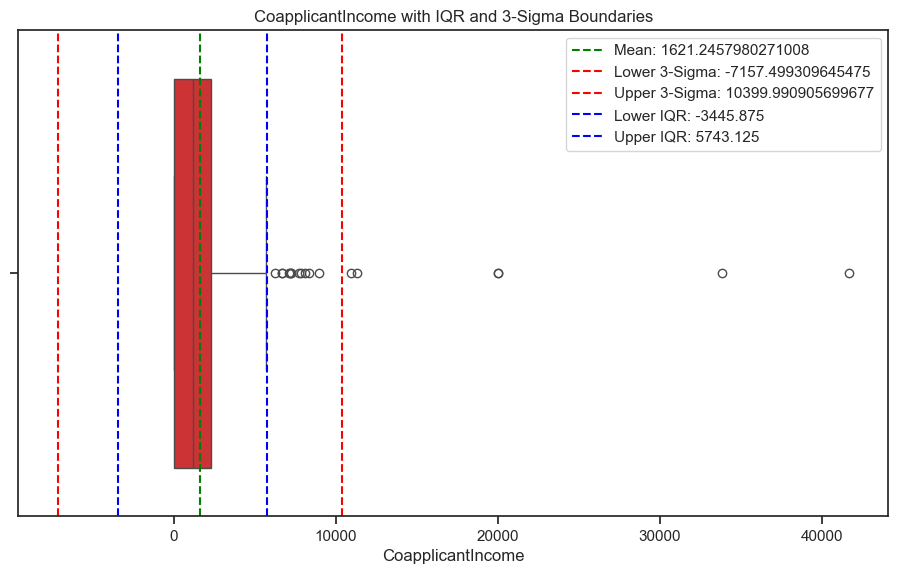

In [81]:
plot_with_boundaries(df, 'CoapplicantIncome')

In [83]:
df.head()

Gender Married  Dependents Education Self_Employed  ApplicantIncome  \
0    1       0        0.0         0           0            5849         
1    1       1        1.0         0           0            4583         
2    1       1        0.0         0           1            3000         
3    1       1        0.0         1           0            2583         
4    1       0        0.0         0           0            6000         

   CoapplicantIncome  LoanAmount  Credit_History Property_Area Loan_Status  \
0          0.0           128.0          1.0             2            1       
1       1508.0           128.0          1.0             0            0       
2          0.0            66.0          1.0             2            1       
3       2358.0           120.0          1.0             2            1       
4          0.0           141.0          1.0             2            1       

   Loan_Amount_Term_Bin  
0            1           
1            1           
2            1           
3            1           
4            1

In [85]:
df.to_csv("loans_clean4.csv")

In [87]:
# EDA post cleanup

In [89]:
df = pd.read_csv("loans_clean4.csv", index_col=False)

In [91]:
df = df.drop(columns=['Unnamed: 0'])

In [93]:
df.shape

(614, 12)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int64  
 1   Married               614 non-null    int64  
 2   Dependents            614 non-null    float64
 3   Education             614 non-null    int64  
 4   Self_Employed         614 non-null    int64  
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Credit_History        614 non-null    float64
 9   Property_Area         614 non-null    int64  
 10  Loan_Status           614 non-null    int64  
 11  Loan_Amount_Term_Bin  614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [97]:
df.describe()

Gender      Married   Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000   614.000000     
mean     0.817590    0.653094    0.744300    0.218241     0.133550     
std      0.386497    0.476373    1.009623    0.413389     0.340446     
min      0.000000    0.000000    0.000000    0.000000     0.000000     
25%      1.000000    0.000000    0.000000    0.000000     0.000000     
50%      1.000000    1.000000    0.000000    0.000000     0.000000     
75%      1.000000    1.000000    1.000000    0.000000     0.000000     
max      1.000000    1.000000    3.000000    1.000000     1.000000     

       ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  \
count     614.000000        614.000000     614.000000    614.000000     
mean     5403.459283       1621.245798     145.827362      0.855049     
std      6109.041673       2926.248369      84.125515      0.352339     
min       150.000000          0.000000       9.000000      0.000000     
25%      2877.500000          0.000000     100.000000      1.000000     
50%      3812.500000       1188.500000     128.000000      1.000000     
75%      5795.000000       2297.250000     165.000000      1.000000     
max     81000.000000      41667.000000     700.000000      1.000000     

       Property_Area  Loan_Status  Loan_Amount_Term_Bin  
count   614.000000    614.000000        614.000000       
mean      1.037459      0.687296          0.877850       
std       0.787482      0.463973          0.327726       
min       0.000000      0.000000          0.000000       
25%       0.000000      0.000000          1.000000       
50%       1.000000      1.000000          1.000000       
75%       2.000000      1.000000          1.000000       
max       2.000000      1.000000          1.000000

In [99]:
# Field types and basic info

def summarize_dataframe(df):
    summary = {
        'Series': [],
        'Type': [],
        'Unique Values': [],
        'Min Value': [],
        'Max Value': [],
        'Mean Value': [],
        'Mode Value': []
    }

    for column in df.columns:
        summary['Series'].append(column)
        summary['Type'].append(df[column].dtype)
        summary['Unique Values'].append(df[column].nunique())
        summary['Min Value'].append(df[column].min() if pd.api.types.is_numeric_dtype(df[column]) else None)
        summary['Max Value'].append(df[column].max() if pd.api.types.is_numeric_dtype(df[column]) else None)
        summary['Mean Value'].append(df[column].mean() if pd.api.types.is_numeric_dtype(df[column]) else None)
        summary['Mode Value'].append(df[column].mode()[0] if not df[column].mode().empty else None)

    return pd.DataFrame(summary)

In [101]:
summarize_dataframe(df)

Series          Type    Unique Values  Min Value  Max Value  \
0                 Gender    int64         2           0.0         1.0    
1                Married    int64         2           0.0         1.0    
2             Dependents  float64         4           0.0         3.0    
3              Education    int64         2           0.0         1.0    
4          Self_Employed    int64         2           0.0         1.0    
5        ApplicantIncome    int64       505         150.0     81000.0    
6      CoapplicantIncome  float64       287           0.0     41667.0    
7             LoanAmount  float64       203           9.0       700.0    
8         Credit_History  float64         2           0.0         1.0    
9          Property_Area    int64         3           0.0         2.0    
10           Loan_Status    int64         2           0.0         1.0    
11  Loan_Amount_Term_Bin    int64         2           0.0         1.0    

    Mean Value   Mode Value  
0      0.817590       1.0    
1      0.653094       1.0    
2      0.744300       0.0    
3      0.218241       0.0    
4      0.133550       0.0    
5   5403.459283    2500.0    
6   1621.245798       0.0    
7    145.827362     128.0    
8      0.855049       1.0    
9      1.037459       1.0    
10     0.687296       1.0    
11     0.877850       1.0

Shape of your Data Set loaded: (614, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  7
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variable

Number of All Scatter Plots = 6


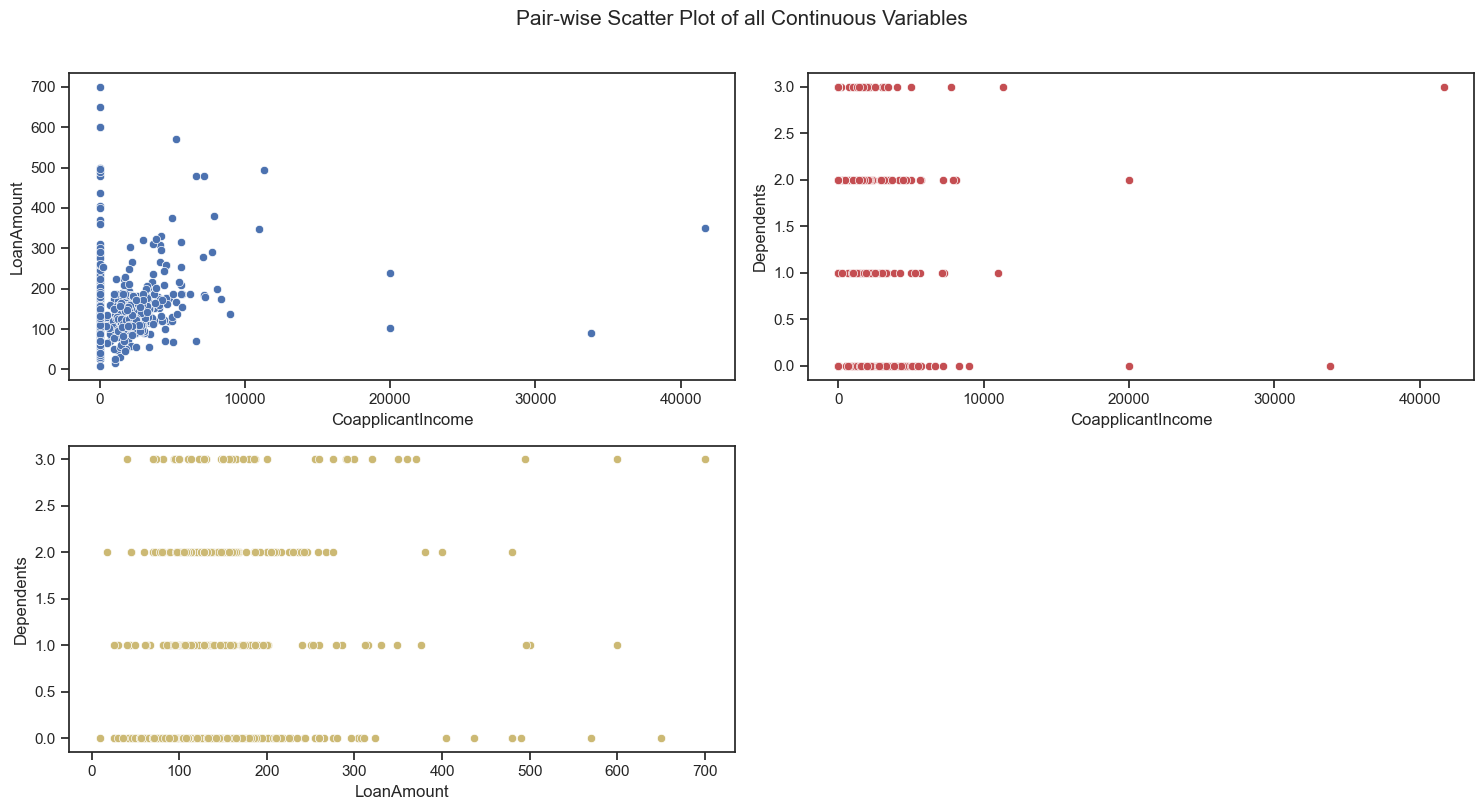

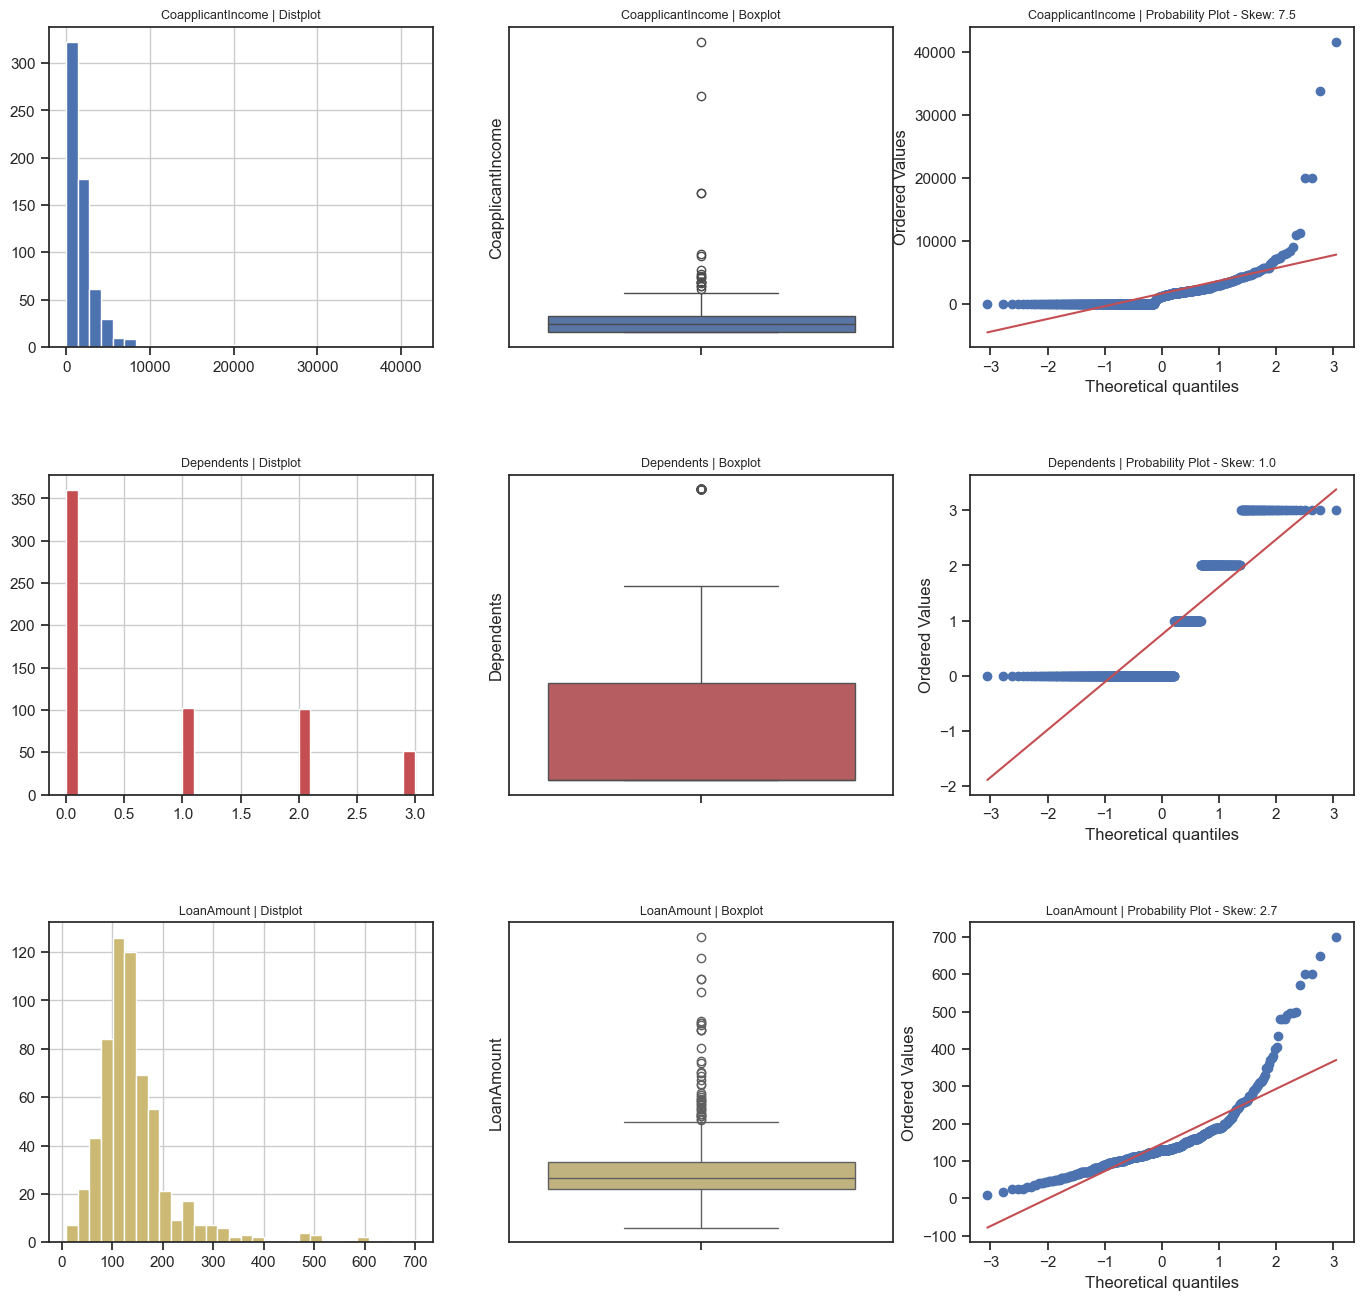

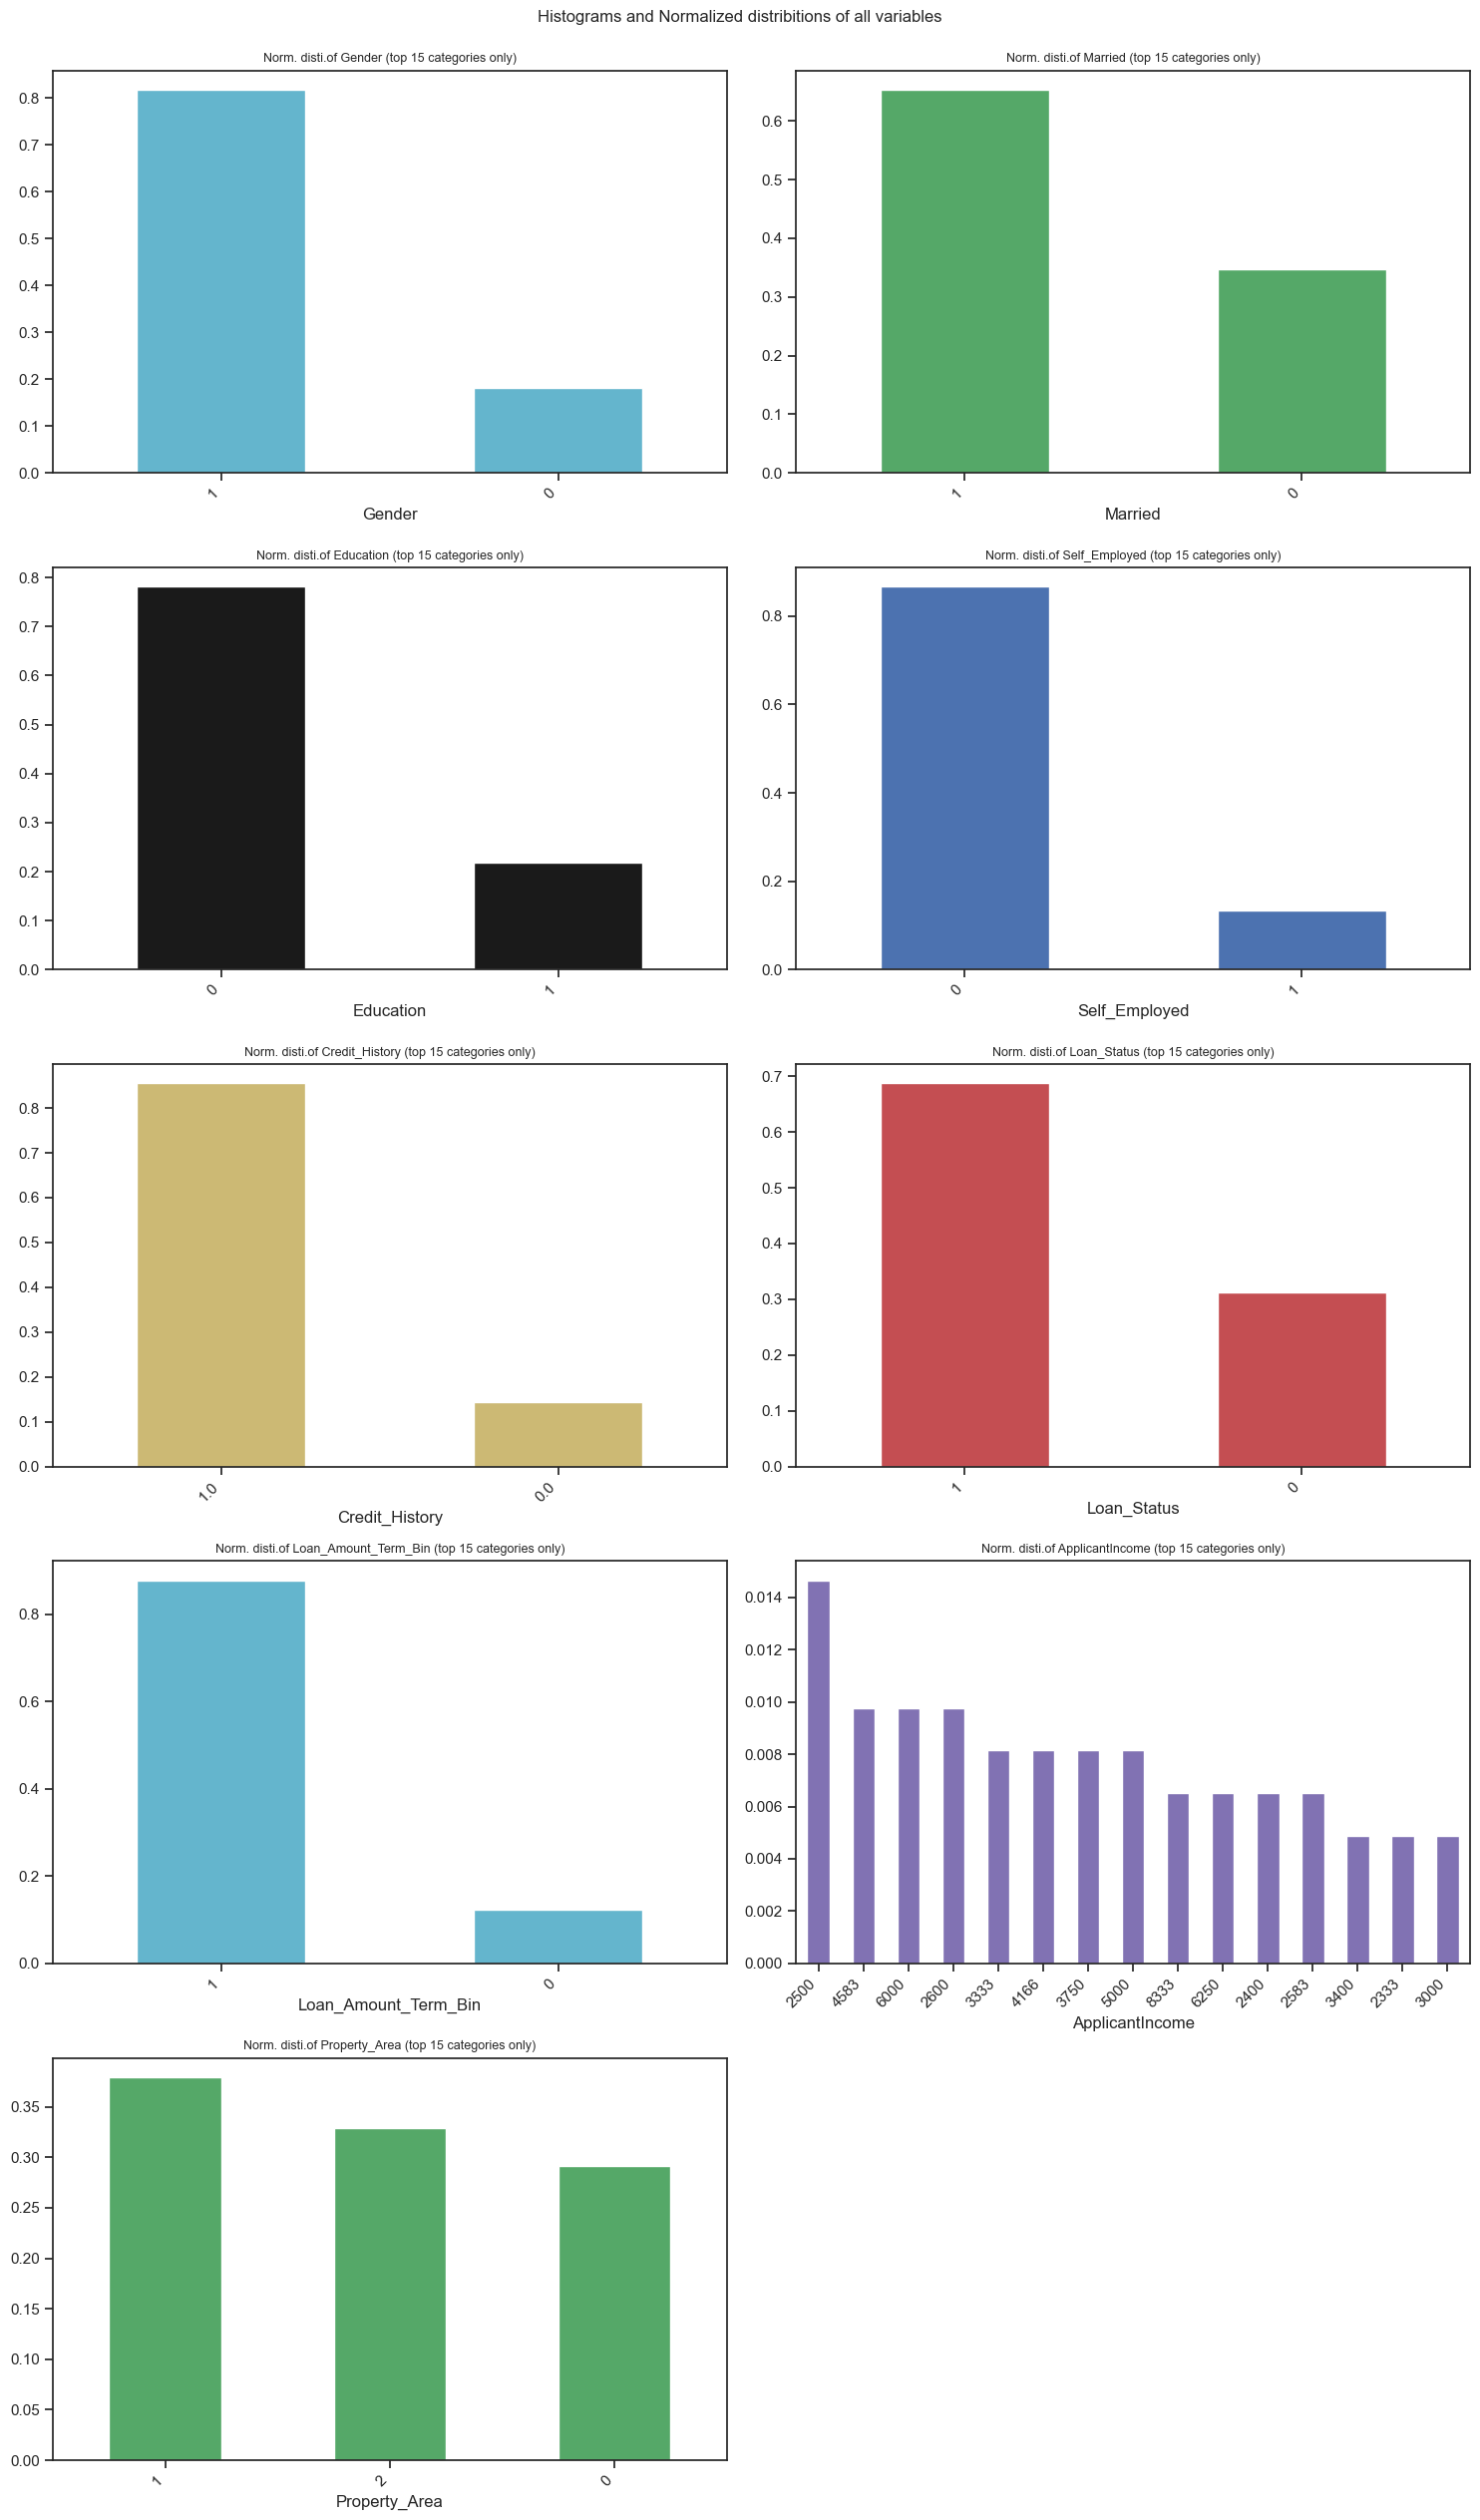

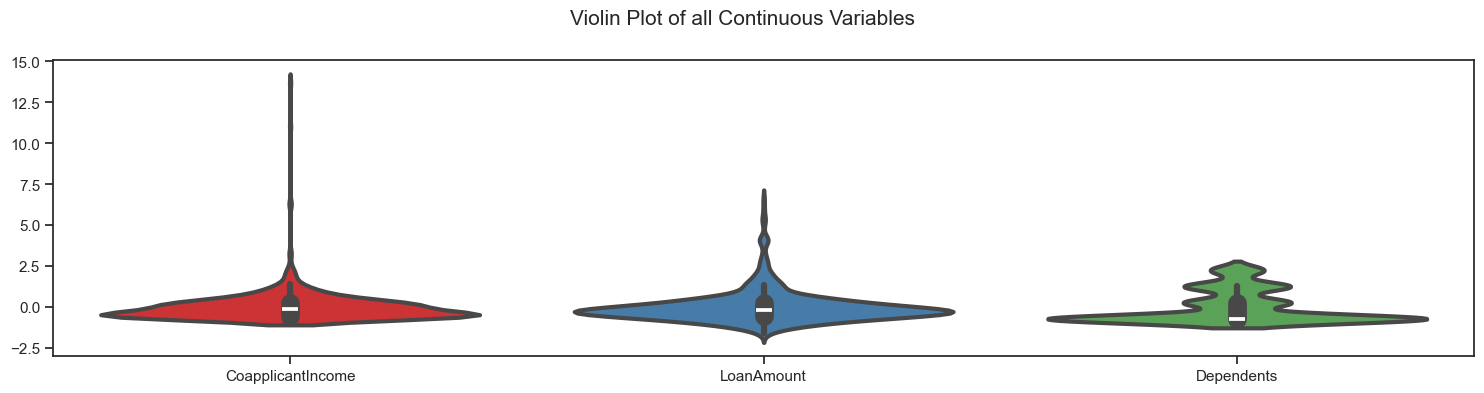

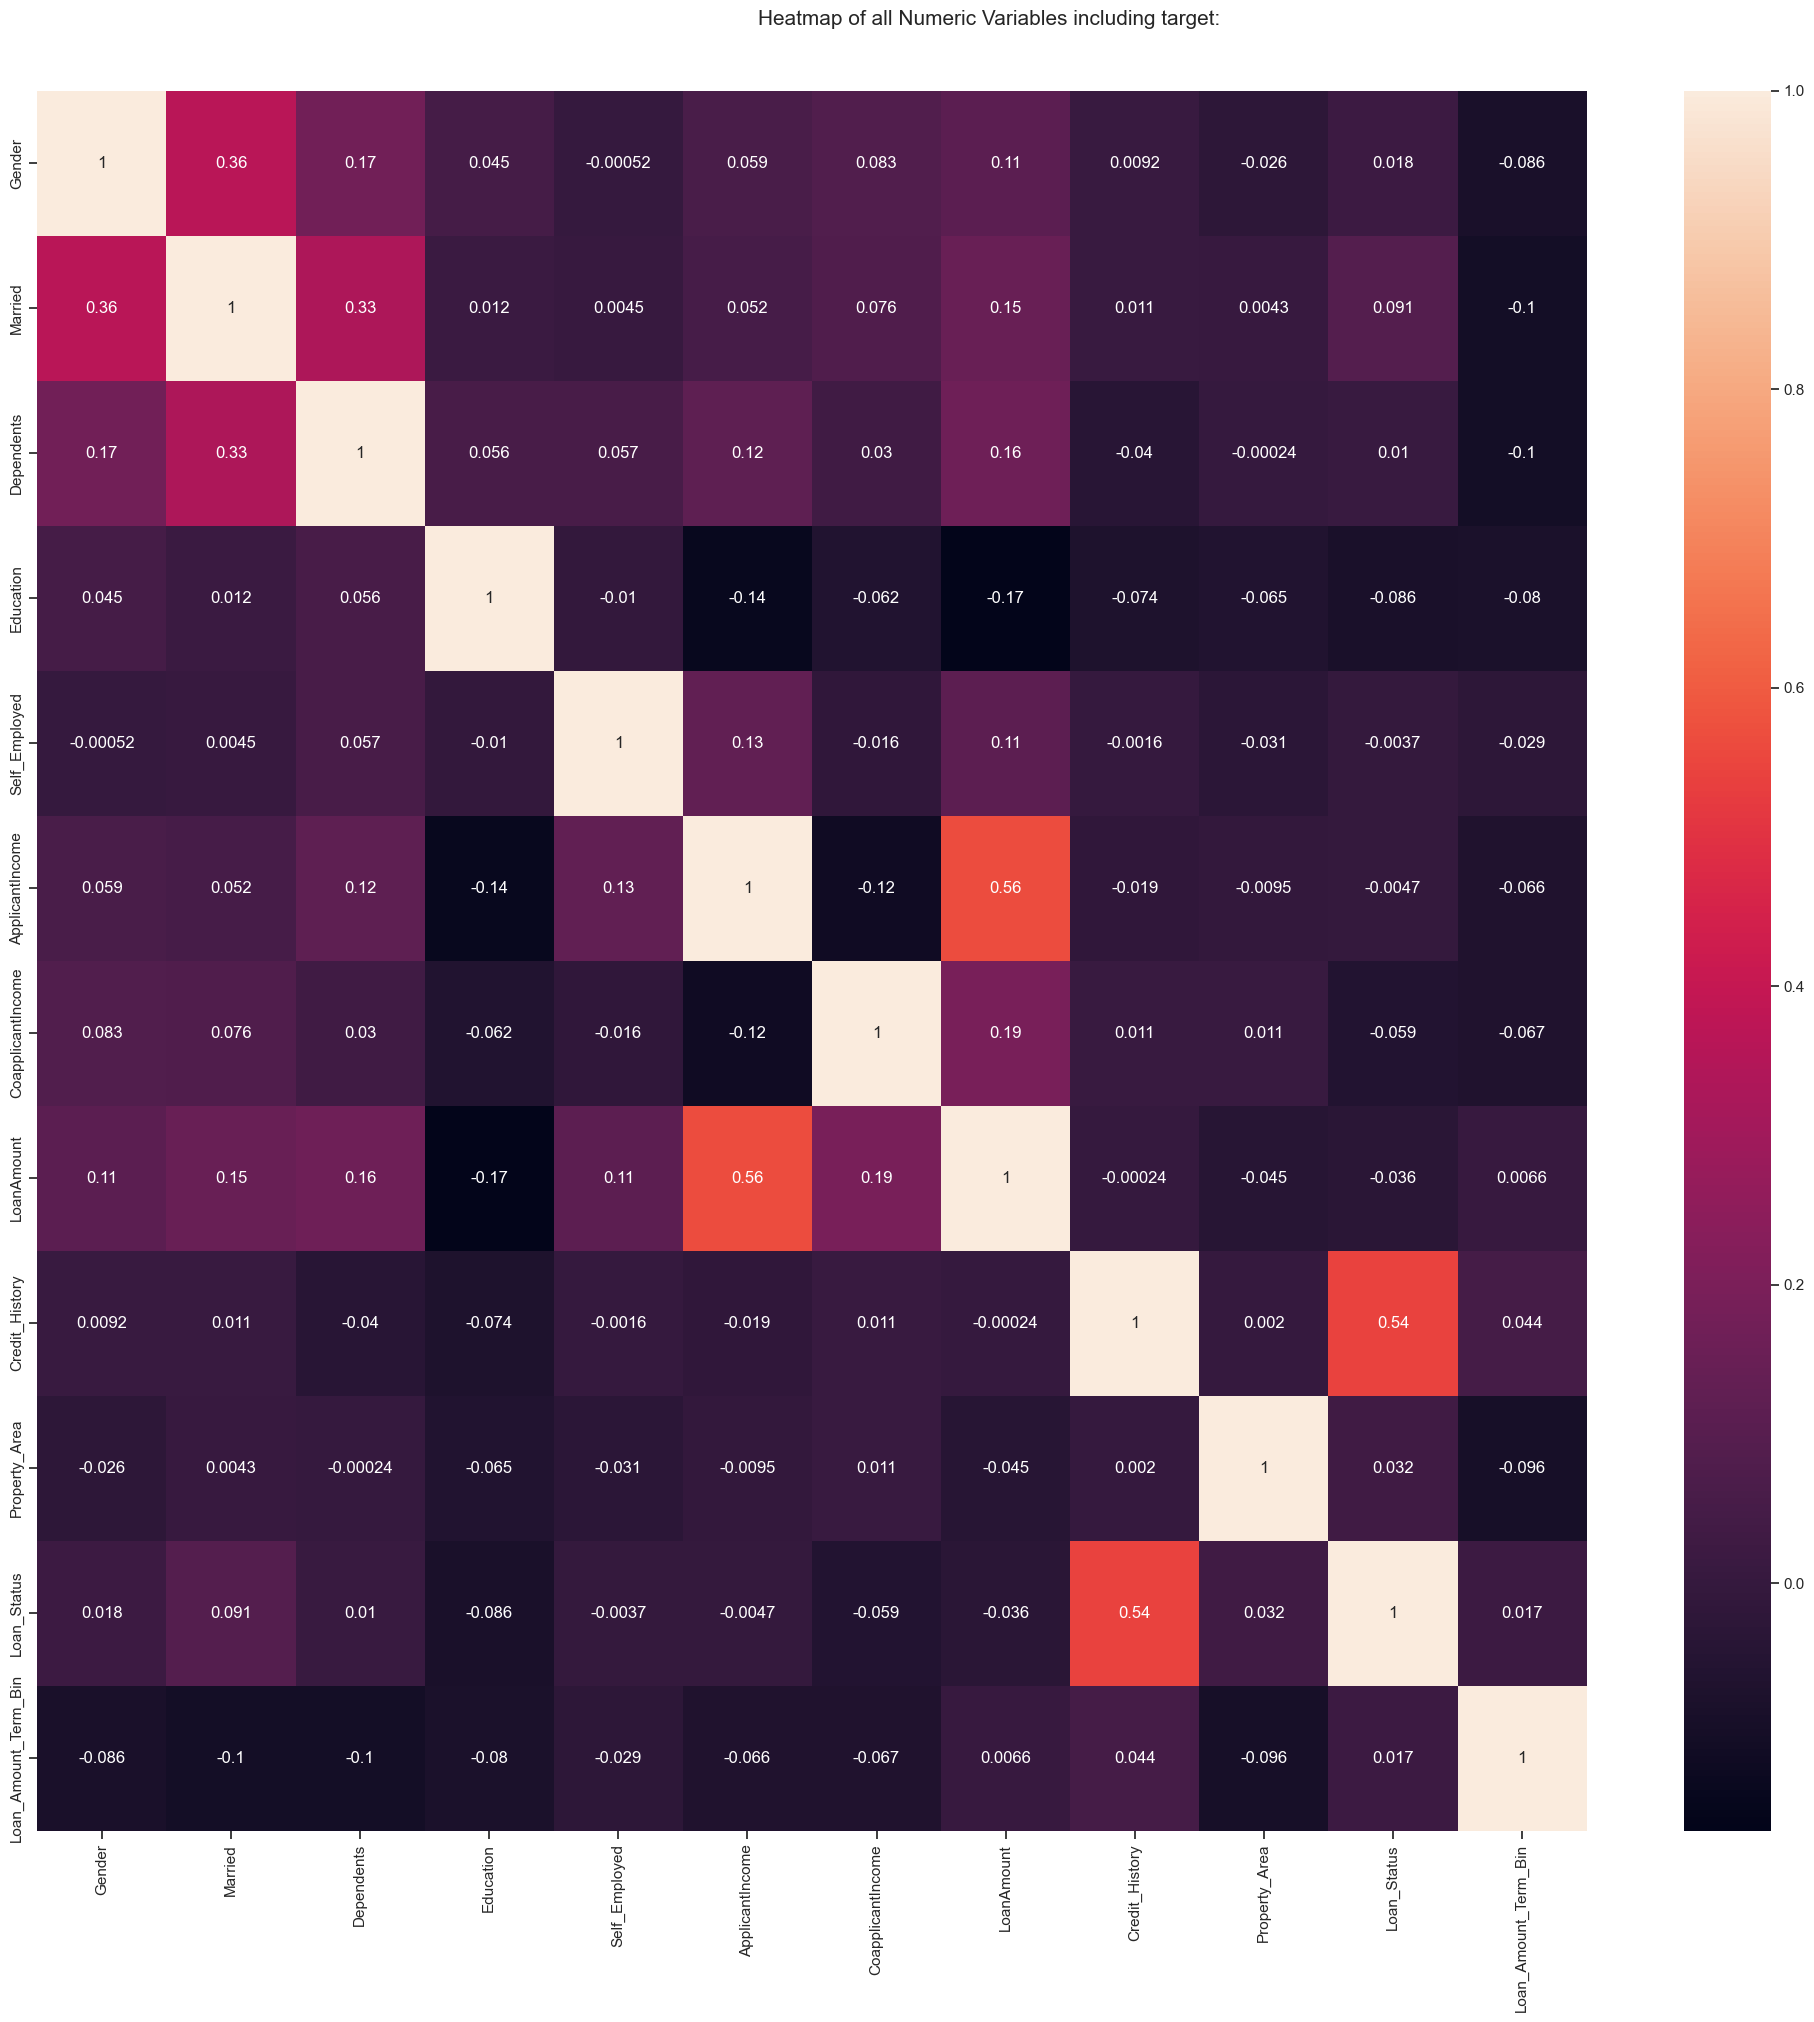

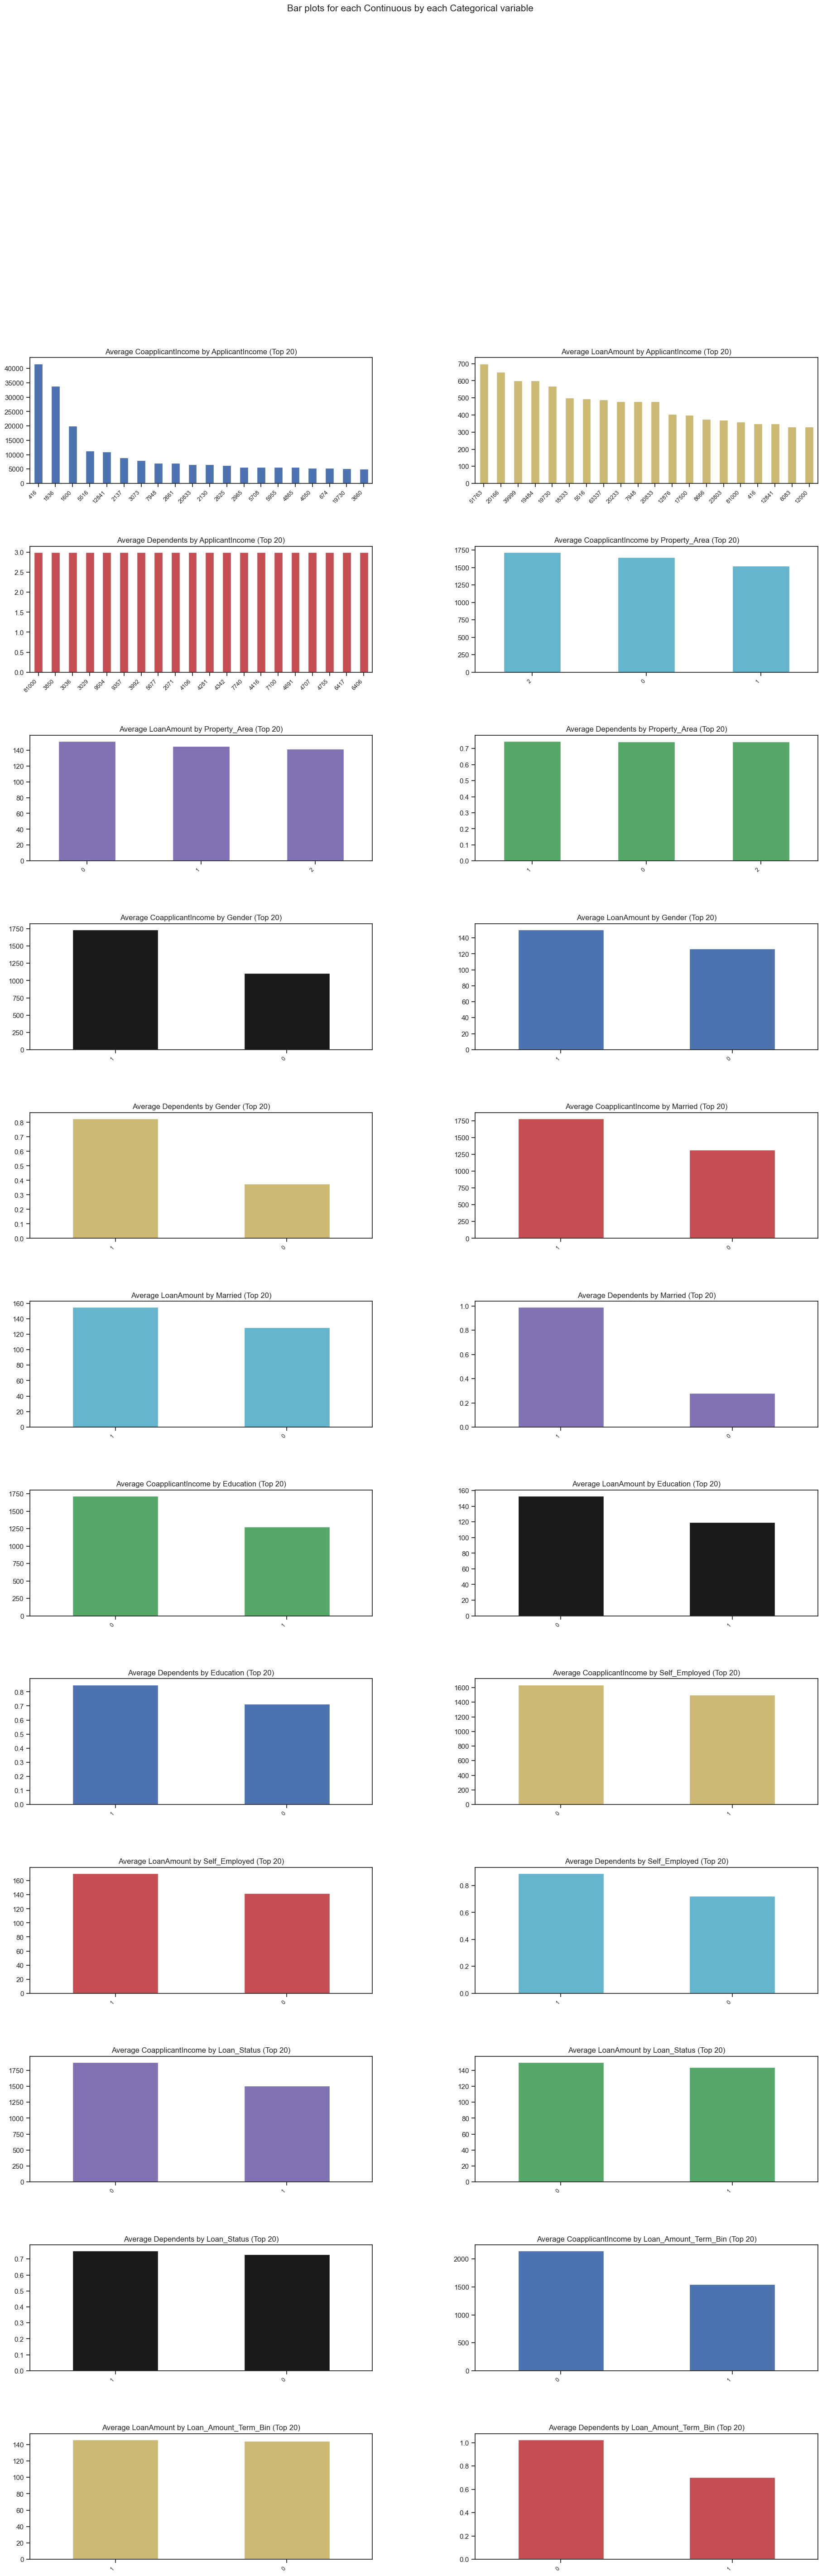

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1       0         0.0         0            0             5849         
1       1       1         1.0         0            0             4583         
2       1       1         0.0         0            1             3000         
3       1       1         0.0         1            0             2583         
4       1       0         0.0         0            0             6000         
..      ...      ...         ...        ...            ...              ...   
609     0       0         0.0         0            0             2900         
610     1       1         3.0         0            0             4106         
611     1       1         1.0         0            0             8072         
612     1       1         2.0         0            0             7583         
613     0       0         0.0         0            1             4583         

     CoapplicantIncome  LoanAmount  Credit_History  Property_Area  \
0            0.0           128.0          1.0             2         
1         1508.0           128.0          1.0             0         
2            0.0            66.0          1.0             2         
3         2358.0           120.0          1.0             2         
4            0.0           141.0          1.0             2         
..                 ...         ...             ...            ...   
609          0.0            71.0          1.0             0         
610          0.0            40.0          1.0             0         
611        240.0           253.0          1.0             2         
612          0.0           187.0          1.0             2         
613          0.0           133.0          0.0             1         

     Loan_Status  Loan_Amount_Term_Bin  
0         1                 1           
1         0                 1           
2         1                 1           
3         1                 1           
4         1                 1           
..           ...                   ...  
609       1                 1           
610       1                 0           
611       1                 1           
612       1                 1           
613       0                 1           

[614 rows x 12 columns]

In [103]:
AV.AutoViz(df)

In [104]:
def plot_loan_amount_distribution(df, x_column, hue_columns):
      for hue_col in hue_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=x_column, hue=hue_col, kde=True, multiple='stack')
        plt.title(f'{x_column} Distribution by {hue_col}')
        plt.xlabel(x_column.replace('_', ' '))
        plt.ylabel('Frequency')
        plt.show()

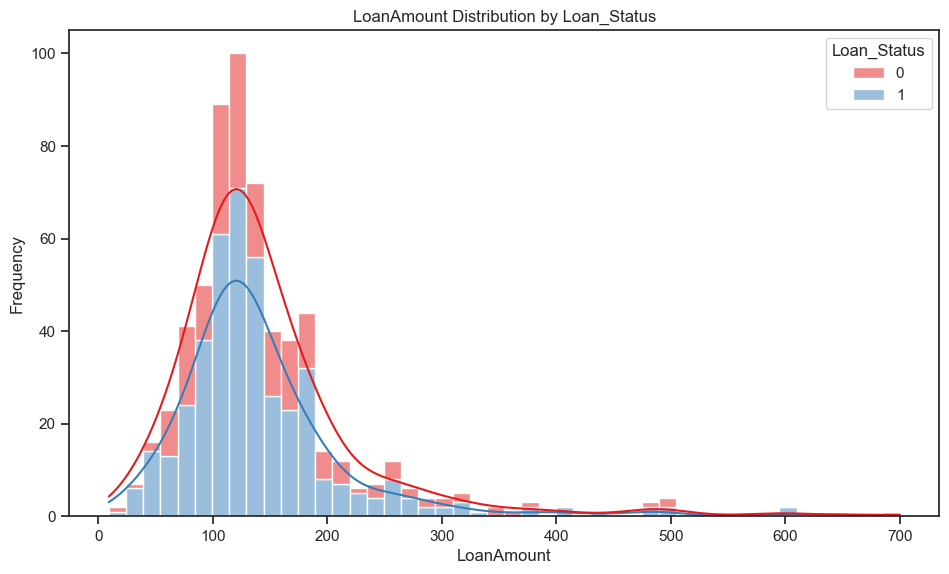

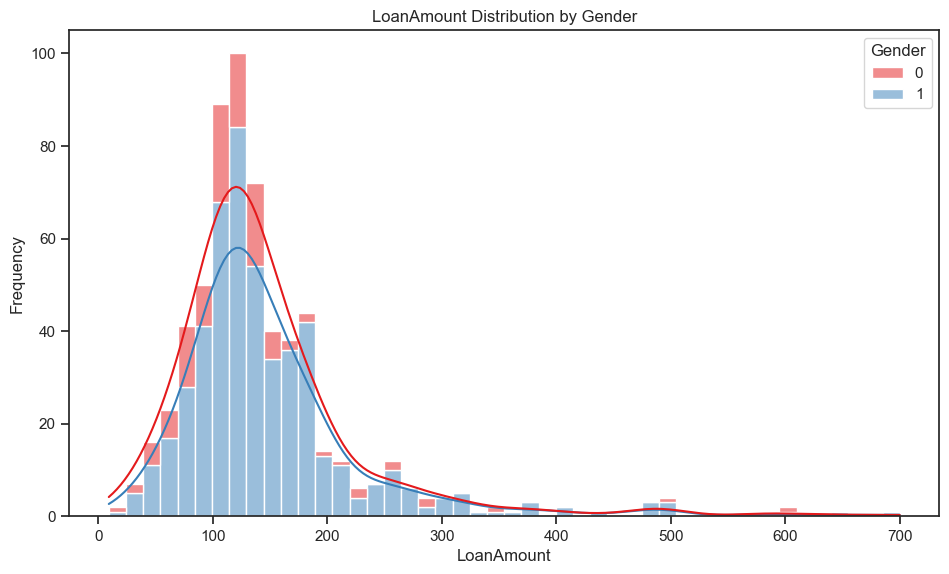

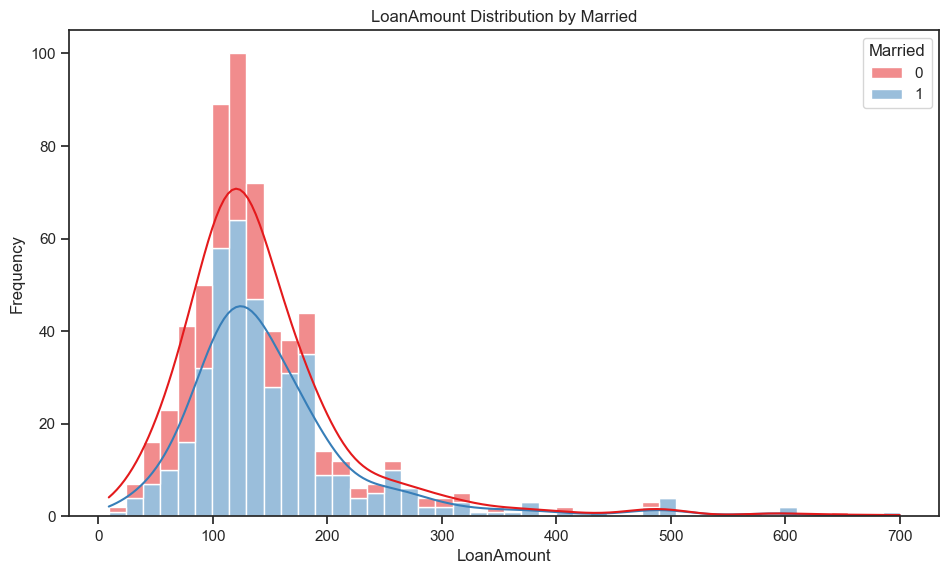

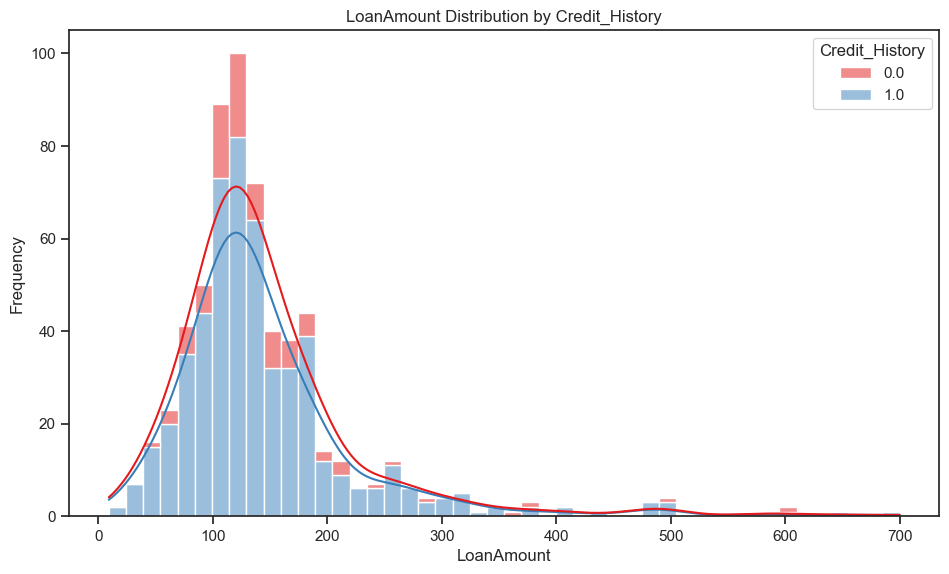

In [105]:
plot_loan_amount_distribution(df, 'LoanAmount', ['Loan_Status', 'Gender', 'Married', 'Credit_History'])

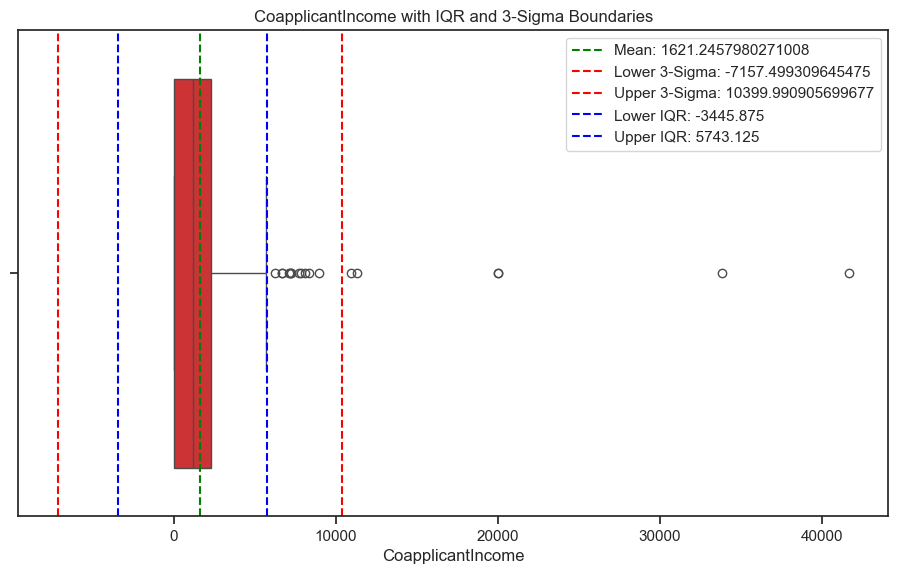

In [106]:
plot_with_boundaries(df, 'CoapplicantIncome')

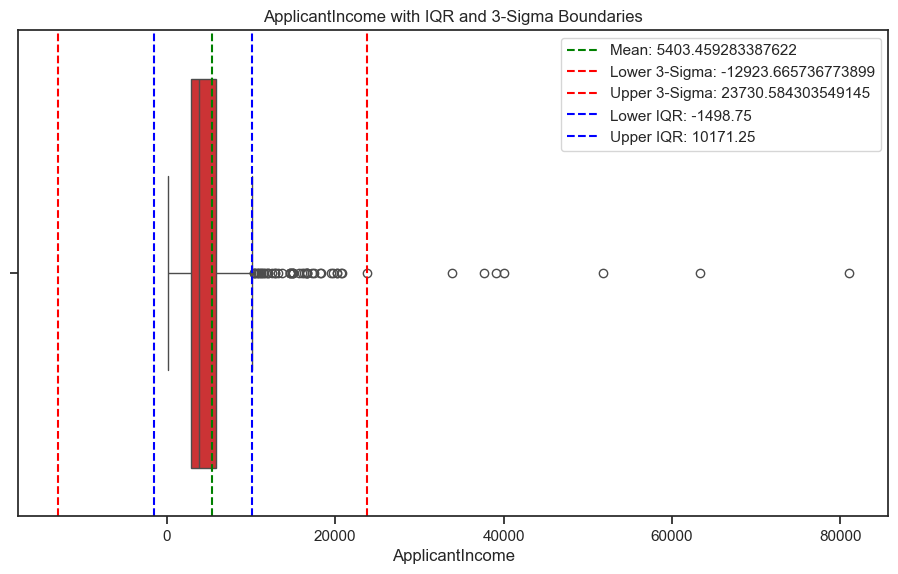

In [107]:
plot_with_boundaries(df, 'ApplicantIncome')

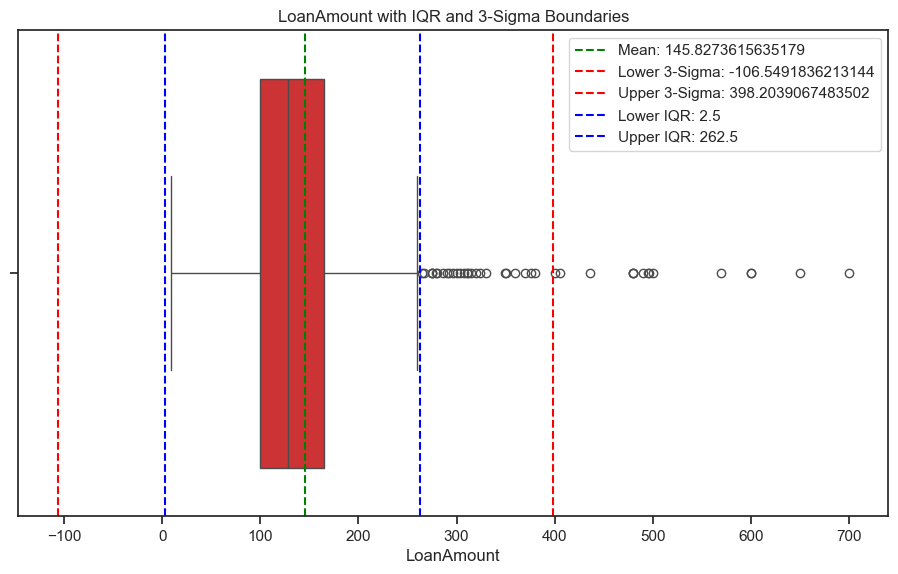

In [110]:
plot_with_boundaries(df, 'LoanAmount')

Outliers were retained in the continuous variables—LoanAmount, ApplicantIncome, and CoapplicantIncome—due to their significant presence. This suggests that these values are not merely random anomalies, but rather integral components of the dataset, essential for accurate predictions.

The Loan_Term_Amount series was modified by consolidating the categories into two groups: 360 and all others.

An imbalanced data approach was deemed unnecessary, as the Loan Status is fairly evenly distributed—45% declined and 55% approved—indicating a balanced situation.